___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [352]:
# libraries for EDA
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline



# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, auc

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
# %pip install --upgrade pandas
# %pip install --upgrade numpy
# %pip install --upgrade scikit-learn
# %pip install --upgrade lightgbm
# %pip install --upgrade xgboost
# %pip install --upgrade catboost
# %pip install --upgrade optuna
# %pip install --upgrade dask
# %pip install cufflinks
# %pip install yellowbrick

In [3]:
# set display options to show all columns
pd.set_option('display.max_columns', None)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
df1 = pd.read_csv('ANSUR II MALE Public.csv', encoding='ISO-8859-1', dtype_backend = 'pyarrow', engine='pyarrow')
df2 = pd.read_csv('ANSUR II FEMALE Public.csv', encoding='ISO-8859-1',dtype_backend = 'pyarrow', engine='pyarrow')
# df1 = pd.read_csv('ANSUR II MALE Public.csv', encoding='ISO-8859-1')
# df2 = pd.read_csv('ANSUR II FEMALE Public.csv', encoding='ISO-8859-1')

In [5]:
df2.rename(columns={'SubjectId': 'subjectid'}, inplace=True)

In [6]:
# controlling column difference
set(df1.columns) - set(df2.columns)

set()

In [7]:
df = pd.concat([df1, df2], axis=0,ignore_index=True)
df.reset_index(drop=True,inplace=True)

In [8]:
print(df1.shape)
print(df2.shape)
print(df.shape)

(4082, 108)
(1986, 108)
(6068, 108)


## Explore Data

In [9]:
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight   
0      10027                             266            1467  \
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight   
0                    337                 222          1347  \
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth   
0                      253               202                401  \
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth   
0                        369               274               493  \
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc   
0                  71               319                        291  \
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight   
0                 142                   979           240            882  \
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference   
0                619                     509                373  \
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight   
0             1535           291                1074         259         1292  \
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion   
0           877                    607                             351  \
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting   
0          36         71             19              247               802  \
1          33         62             18              232        

In [10]:
df.sample(3)

subjectid  abdominalextensiondepthsitting  acromialheight   
90        10677                             255            1429  \
5535      26018                             290            1345   
1151      14669                             267            1491   

      acromionradialelength  anklecircumference  axillaheight   
90                      329                 235          1319  \
5535                    328                 242          1252   
1151                    351                 217          1381   

      balloffootcircumference  balloffootlength  biacromialbreadth   
90                        250               190                429  \
5535                      246               203                384   
1151                      252               198                424   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth   
90                          363               278               518  \
5535                        380               286               485   
1151                        345               284               502   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc   
90                    72               340                        320  \
5535                  77               327                        306   
1151                  72               346                        320   

      bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight   
90                   146                  1054           263            898  \
5535                 138                  1174           285            857   
1151                 132                  1014           247            919   

      buttockkneelength  buttockpopliteallength  calfcircumference   
90                  615                     494                394  \
5535                650                     518                445   
1151                643                     523                371   

      cervicaleheight  chestbreadth  chestcircumference  chestdepth   
90               1510           291                1027         246  \
5535             1395           263                 984         280   
1151             1580           308                1092         261   

      chestheight  crotchheight  crotchlengthomphalion   
90           1288           841                    654  \
5535         1191           773                    710   
1151         1316           863                    623   

      crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion   
90                               383          36         59             18  \
5535                             416          33         60             18   
1151                             370          37         74             23   

      elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength   
90                249               807                     99         269  \
5535              228               737                     99         265   
1151              243               841                    101         269   

      forearmcenterofgriplength  forearmcircumferenceflexed   
90                          340                         322  \
5535                        329                         301   
1151                        362                         299   

      forearmforearmbreadth  forearmhandlength  functionalleglength   
90                      574                467                 1082  \
5535                    550                470                 1090   
1151                    586                490                 1171   

      handbreadth  handcircumference  handlength  headbreadth   
90             89                215         197          155  \
5535           85                203         204          150   
1151           92                217         191          147   

      headcircumference  headlength  heelanklecircumference  heelbreadth   


In [11]:
df['Ethnicity'] = df.Ethnicity.apply(lambda x: 0 if x=='' else 1)

In [12]:
df.loc[df.DODRace.isin([1,2,3])].groupby('DODRace').Ethnicity.value_counts(normalize=True) *100

DODRace  Ethnicity
1        0            93.960970
         1             6.039030
2        0            83.050847
         1            16.949153
3        1            99.558174
         0             0.441826
Name: proportion, dtype: float64

In [13]:
df.drop('Ethnicity', axis=1, inplace=True)

In [14]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation',
       'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=107)

In [15]:
df.describe()

subjectid  abdominalextensiondepthsitting  acromialheight   
count        6068.0                          6068.0          6068.0  \
mean   20757.198418                      246.468688     1406.161338   
std    13159.390894                       37.400106       79.091048   
min         10027.0                           155.0          1115.0   
25%        14841.75                           219.0          1350.0   
50%         20063.5                           242.0          1410.0   
75%         27234.5                           271.0          1462.0   
max        920103.0                           451.0          1683.0   

       acromionradialelength  anklecircumference  axillaheight   
count                 6068.0              6068.0        6068.0  \
mean              327.374423          224.891397   1299.608767   
std                20.720018           16.051833     72.022286   
min                    249.0               156.0        1038.0   
25%                    313.0               214.0        1249.0   
50%                    328.0               225.0        1302.0   
75%                   341.25               235.0        1349.0   
max                    393.0               293.0        1553.0   

       balloffootcircumference  balloffootlength  biacromialbreadth   
count                   6068.0            6068.0             6068.0  \
mean                 244.19265        194.754614         399.204186   
std                   16.84502         13.516368          30.236914   
min                      186.0             151.0              283.0   
25%                      232.0             185.0              376.0   
50%                      245.0             195.0              404.0   
75%                      256.0             204.0              421.0   
max                      306.0             245.0              489.0   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth   
count                     6068.0            6068.0            6068.0  \
mean                  340.934245        274.735003         490.75445   
std                    41.519866         19.221034         42.135535   
min                        216.0             197.0             357.0   
25%                        311.0             262.0             460.0   
50%                        341.0             274.0             492.0   
75%                        370.0             288.0             520.0   
max                        490.0             362.0             637.0   

       bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc   
count              6068.0            6068.0                     6068.0  \
mean            72.252637        324.896506                 306.636124   
std               5.34459         17.087501                  20.794166   
min                  55.0             267.0                      245.0   
25%                  68.0             314.0                      292.0   
50%                  72.0             326.0                      307.0   
75%                  76.0             336.0                      321.0   
max                  91.0             385.0                      390.0   

       bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight   
count              6068.0                6068.0        6068.0         6068.0  \
mean           139.723467           1020.084707    241.619974     870.152274   
std              7.308457             76.422643     26.482986      54.822574   
min                 116.0                 737.0         168.0          656.0   
25%                 135.0                 968.0         222.0          832.0   
50%                 140.0                1017.0         241.0          868.0   
75%                 145.0                1068.0         259.0         906.25   
max                 174.0                1341.0         349.0         1080.0   

       buttockkneelength  buttockpopliteallength  calfcircumference   
count             6068.0   

In [16]:
df.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 107, dtype: int64

In [17]:
pd.DataFrame(df.dtypes).T

subjectid abdominalextensiondepthsitting  acromialheight   
0  int64[pyarrow]                 int64[pyarrow]  int64[pyarrow]  \

  acromionradialelength anklecircumference    axillaheight   
0        int64[pyarrow]     int64[pyarrow]  int64[pyarrow]  \

  balloffootcircumference balloffootlength biacromialbreadth   
0          int64[pyarrow]   int64[pyarrow]    int64[pyarrow]  \

  bicepscircumferenceflexed bicristalbreadth bideltoidbreadth   
0            int64[pyarrow]   int64[pyarrow]   int64[pyarrow]  \

  bimalleolarbreadth bitragionchinarc bitragionsubmandibulararc   
0     int64[pyarrow]   int64[pyarrow]            int64[pyarrow]  \

  bizygomaticbreadth buttockcircumference    buttockdepth   buttockheight   
0     int64[pyarrow]       int64[pyarrow]  int64[pyarrow]  int64[pyarrow]  \

  buttockkneelength buttockpopliteallength calfcircumference cervicaleheight   
0    int64[pyarrow]         int64[pyarrow]    int64[pyarrow]  int64[pyarrow]  \

     chestbreadth chestcircumference      chestdepth     chestheight   
0  int64[pyarrow]     int64[pyarrow]  int64[pyarrow]  int64[pyarrow]  \

     crotchheight crotchlengthomphalion crotchlengthposterioromphalion   
0  int64[pyarrow]        int64[pyarrow]                 int64[pyarrow]  \

       earbreadth       earlength   earprotrusion elbowrestheight   
0  int64[pyarrow]  int64[pyarrow]  int64[pyarrow]  int64[pyarrow]  \

  eyeheightsitting footbreadthhorizontal      footlength   
0   int64[pyarrow]        int64[pyarrow]  int64[pyarrow]  \

  forearmcenterofgriplength forearmcircumferenceflexed forearmforearmbreadth   
0            int64[pyarrow]             int64[pyarrow]        int64[pyarrow]  \

  forearmhandlength functionalleglength     handbreadth handcircumference   
0    int64[pyarrow]      int64[pyarrow]  int64[pyarrow]    int64[pyarrow]  \

       handlength     headbreadth headcircumference      headlength   
0  int64[pyarrow]  int64[pyarrow]    int64[pyarrow]  int64[pyarrow]  \

  heelanklecircumference     heelbreadth      hipbreadth hipbreadthsitting   
0         int64[pyarrow]  int64[pyarrow]  int64[pyarrow]    int64[pyarrow]  \

  iliocristaleheight interpupillarybreadth      interscyei     interscyeii   
0     int64[pyarrow]        int64[pyarrow]  int64[pyarrow]  int64[pyarrow]  \

  kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight   
0       int64[pyarrow]    int64[pyarrow]                 int64[pyarrow]  \

  lateralmalleolusheight lowerthighcircumference mentonsellionlength   
0         int64[pyarrow]          int64[pyarrow]      int64[pyarrow]  \

  neckcircumference neckcircumferencebase overheadfingertipreachsitting   
0    int64[pyarrow]        int64[pyarrow]                int64[pyarrow]  \

       palmlength poplitealheight radialestylionlength shouldercircumference   
0  int64[pyarrow]  int64[pyarrow]       int64[pyarrow]        int64[pyarrow]  \

  shoulderelbowlength  shoulderlength   sittingheight sleevelengthspinewrist   
0      int64[pyarrow]  int64[pyarrow]  int64[pyarrow]         int64[pyarrow]  \

    sleeveoutseam            span         stature suprasternaleheight   
0  int64[pyarrow]  int64[pyarrow]  int64[pyarrow]      int64[pyarrow]  \

   tenthribheight thighcircumference  thighclearance   thumbtipreach   
0  int64[pyarrow]     int64[pyarrow]  int64[pyarrow]  int64[pyarrow]  \

     tibialheight tragiontopofhead trochanterionheight   
0  int64[pyarrow]   int64[pyarrow]      int64[pyarrow]  \

  verticaltrunkcircumferenceusa waistbacklength    waistbreadth   
0                int64[pyarrow]  int64[pyarrow]  int64[pyarrow]  \

  waistcircumference      waistdepth waistfrontlengthsitting   
0     int64[pyarrow]  int64[pyarrow]          int64[pyarrow]  \

  waistheightomphalion        weightkg wristcircumference     wristheight   
0       int64[pyarrow]  int64[pyarrow]     int64[pyarrow]  int64[pyarrow]  \

            Gender             Date     Installation        Component   
0  string[pyarrow]  string[pyarrow]  s

In [18]:
# quickly identifying which columns have missing data in this large DataFrame.
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [19]:
df['SubjectsBirthLocation'].unique()

<ArrowExtensionArray>
[            'North Dakota',                 'New York',
                'Wisconsin',           'North Carolina',
                 'Kentucky',              'Mississippi',
                  'Romania',                 'Arkansas',
                 'Maryland',                  'Arizona',
 ...
                'Sri Lanka',               'Bangladesh',
               'Azerbaijan',                'Venezuela',
                     'Fiji', 'Northern Mariana Islands',
                     'Iran',   'Bosnia and Herzegovina',
                  'Bermuda',                  'Denmark']
Length: 152, dtype: string[pyarrow]

In [20]:
us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
#df['IsBirthInUS'] = df['SubjectsBirthLocation'].apply(lambda x: 1 if x in us_states else 0)

In [21]:
df['SubjectNumericRace'].unique()

<ArrowExtensionArray>
[    1,     2,   351,     3,    61,     4,    28,     5,    21,    41,    31,
   641,    23,     8,   251,    38,     6,    51,    18,    64,   318,    63,
    25,    43,   423,    35,   425,   235,   358,    62,    42,   451,   238,
  4251,   431,  2518,   218,   231,   428,   651,   631,    48,  2351, 42351]
Length: 44, dtype: int64[pyarrow]

In [22]:
df.SubjectNumericRace.corr(df.DODRace)

0.01798744618675964

In [23]:
df[df.SubjectNumericRace == df.DODRace][['DODRace','SubjectNumericRace']]

DODRace  SubjectNumericRace
0           1                   1
1           1                   1
2           2                   2
3           1                   1
4           2                   2
...       ...                 ...
6063        3                   3
6064        3                   3
6065        2                   2
6066        3                   3
6067        3                   3

[5262 rows x 2 columns]

In [24]:
dropcolumns = ['subjectid','Date','Component','Branch','PrimaryMOS','Installation','SubjectNumericRace', 'Weightlbs', 'Heightin']
df.drop(dropcolumns, axis=1, inplace=True)

In [25]:
# to find how many unique values object features have
for col in df.select_dtypes("string[pyarrow]"):
  print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [26]:
df.shape

(6068, 98)

In [27]:
df.duplicated().sum()

0

In [28]:
df.isnull().sum().any() #No missing values

False

In [29]:
df['DODRace'].value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64[pyarrow]

In [30]:
df['DODRace'].value_counts()[df['DODRace'].value_counts() < 500].index

Index([4, 6, 5, 8], dtype='int64[pyarrow]', name='DODRace')

In [31]:
df.shape

(6068, 98)

In [32]:
rows_to_drop = df[df['DODRace'].isin([4, 6, 5, 8])].index

In [33]:
df.drop(rows_to_drop,inplace=True)
df.reset_index(drop=True,inplace=True)

In [34]:
df.shape

(5769, 98)

In [35]:
df['DODRace'].value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64[pyarrow]

In [36]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic"
})

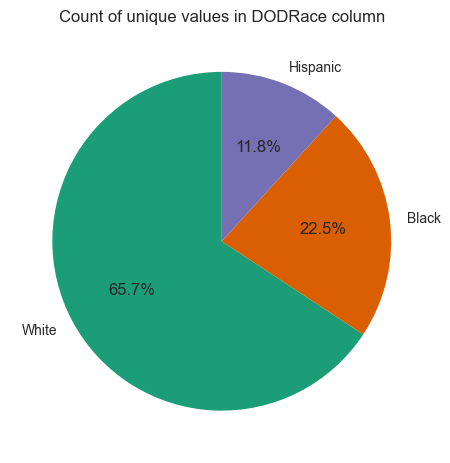

In [37]:
counts = df["DODRace"].value_counts()

# Create a pie plot of the counts
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Dark2')[0:3])
plt.title('Count of unique values in DODRace column')
plt.show()

In [38]:
for i, feature in enumerate(df.select_dtypes("string[pyarrow]").columns): 
   print(f"{i}.{feature}: {df[feature].unique()}")

# for i, feature in enumerate(df.select_dtypes("object").columns): 
#    print(f"{i}.{feature}: {df[feature].unique()}")
        
# object featurların unique kategorik gözlemlerini listeliyoruz.

0.Gender: <ArrowExtensionArray>
['Male', 'Female']
Length: 2, dtype: string[pyarrow]
1.SubjectsBirthLocation: <ArrowExtensionArray>
[          'North Dakota',               'New York',              'Wisconsin',
         'North Carolina',               'Kentucky',            'Mississippi',
                'Romania',               'Arkansas',               'Maryland',
                'Arizona',
 ...
                  'Chile',               'Bulgaria',    'Antigua and Barbuda',
              'Sri Lanka',             'Azerbaijan',              'Venezuela',
                   'Iran', 'Bosnia and Herzegovina',                'Bermuda',
                'Denmark']
Length: 136, dtype: string[pyarrow]
2.WritingPreference: <ArrowExtensionArray>
['Right hand', 'Left hand', 'Either hand (No preference)']
Length: 3, dtype: string[pyarrow]


In [39]:
df.Gender.value_counts()

Gender
Male      3899
Female    1870
Name: count, dtype: int64[pyarrow]

DODRace
White       0.657306
Black       0.224996
Hispanic    0.117698
Name: proportion, dtype: float64


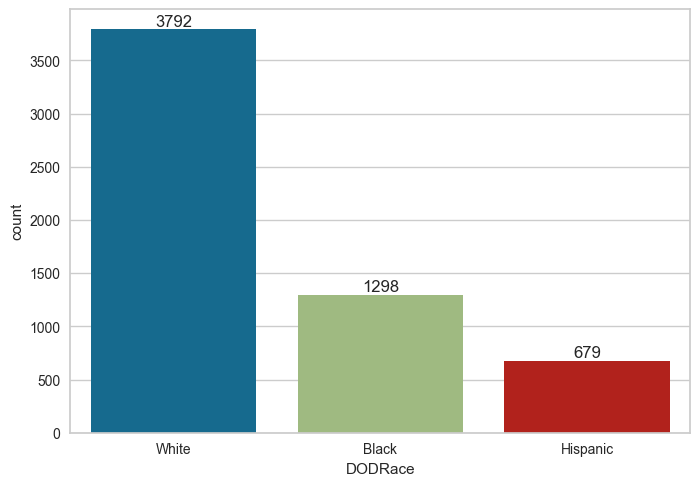

In [40]:
print(df["DODRace"].value_counts(normalize=True)) # to show the proportion of each class
ax=sns.countplot(data= df, x="DODRace")
ax.bar_label(ax.containers[0]);

In [41]:
df.columns.get_loc('DODRace')

95

In [42]:
len(df.columns)

98

In [43]:
# Get list of column names
cols = df.columns.tolist()

# Move 'DODRace' to the last position
cols.remove('DODRace')
cols.append('DODRace')

# Assign reordered column list back to dataframe
df = df[cols]

In [44]:
df.sample(1)

abdominalextensiondepthsitting  acromialheight  acromionradialelength   
2142                             280            1424                    333  \

      anklecircumference  axillaheight  balloffootcircumference   
2142                 242          1322                      247  \

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed   
2142               208                445                        433  \

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth   
2142               267               554                  72  \

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth   
2142               373                        332                 148  \

      buttockcircumference  buttockdepth  buttockheight  buttockkneelength   
2142                  1074           266            879                660  \

      buttockpopliteallength  calfcircumference  cervicaleheight   
2142                     545                427             1483  \

      chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight   
2142           289                1123         272         1286           845  \

      crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth   
2142                    580                             306          37  \

      earlength  earprotrusion  elbowrestheight  eyeheightsitting   
2142         66             25              240               748  \

      footbreadthhorizontal  footlength  forearmcenterofgriplength   
2142                    105         276                        368  \

      forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength   
2142                         354                    613                493  \

      functionalleglength  handbreadth  handcircumference  handlength   
2142                 1188           85                203         192  \

      headbreadth  headcircumference  headlength  heelanklecircumference   
2142          154                591         209                     348  \

      heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight   
2142           83         348                392                1045  \

      interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella   
2142                    685         414          441                   502  \

      kneeheightsitting  lateralfemoralepicondyleheight   
2142                553                             485  \

      lateralmalleolusheight  lowerthighcircumference  mentonsellionlength   
2142                      72                      447                  126  \

      neckcircumference  neckcircumferencebase  overheadfingertipreachsitting   
2142                439                    467                           1479  \

      palmlength  poplitealheight  radialestylionlength   
2142         128              414                   284  \

      shouldercircumference  shoulderelbowlength  shoulderlength   
2142                   1256                  351             149  \

      sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature   
2142            849                     948            611  1887     1692  \

      suprasternaleheight  tenthribheight  thighcircumference  thighclearance   
2142                 1409            1114                 713             206  \

      thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight   
2142            860           464               126                  901  \

      verticaltrunkcircumferenceusa  waistbacklength  waistbreadth   
2142                           1702              488           334  \

      waistcircumference  waistdepth  waistfrontlengthsitting   
2142                1017         256                      385  \

      waistheightomphalion  weightkg  wristcircumference  wristheight Gender   
2142                  1026       978                 172          834   Male  \

     SubjectsBirthLocation  Age WritingPrefer

In [45]:
# df = df.astype('float64[pyarrow]')

In [46]:
df.sample(1)

abdominalextensiondepthsitting  acromialheight  acromionradialelength   
759                             277            1400                    321  \

     anklecircumference  axillaheight  balloffootcircumference   
759                 227          1283                      265  \

     balloffootlength  biacromialbreadth  bicepscircumferenceflexed   
759               205                437                        437  \

     bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc   
759               246               541                  76               348  \

     bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference   
759                        325                 145                  1062  \

     buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength   
759           249            868                633                     518  \

     calfcircumference  cervicaleheight  chestbreadth  chestcircumference   
759                415             1493           280                1153  \

     chestdepth  chestheight  crotchheight  crotchlengthomphalion   
759         270         1240           852                    638  \

     crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion   
759                             357          41         65             21  \

     elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength   
759              245               795                    103         275  \

     forearmcenterofgriplength  forearmcircumferenceflexed   
759                        363                         356  \

     forearmforearmbreadth  forearmhandlength  functionalleglength   
759                    650                481                 1090  \

     handbreadth  handcircumference  handlength  headbreadth   
759           91                217         186          165  \

     headcircumference  headlength  heelanklecircumference  heelbreadth   
759                601         205                     350           86  \

     hipbreadth  hipbreadthsitting  iliocristaleheight  interpupillarybreadth   
759         340                398                1036                    665  \

     interscyei  interscyeii  kneeheightmidpatella  kneeheightsitting   
759         461          475                   483                550  \

     lateralfemoralepicondyleheight  lateralmalleolusheight   
759                             470                      70  \

     lowerthighcircumference  mentonsellionlength  neckcircumference   
759                      424                  130                411  \

     neckcircumferencebase  overheadfingertipreachsitting  palmlength   
759                    444                           1435         114  \

     poplitealheight  radialestylionlength  shouldercircumference   
759              414                   266                   1297  \

     shoulderelbowlength  shoulderlength  sittingheight   
759                  350             167            902  \

     sleevelengthspinewrist  sleeveoutseam  span  stature   
759                     903            565  1833     1729  \

     suprasternaleheight  tenthribheight  thighcircumference  thighclearance   
759                 1415            1090                 694             194  \

     thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight   
759            804           456               136                  899  \

     verticaltrunkcircumferenceusa  waistbacklength  waistbreadth   
759                           1622              441           339  \

     waistcircumference  waistdepth  waistfrontlengthsitting   
759                 962         231                      402  \

     waistheightomphalion  weightkg  wristcircumference  wristheight Gender   
759                  1051       959                 177          824   Male  \

    SubjectsBirthLocation  Age WritingPreference DODRace  
759             Louisiana   40         

In [47]:
# pip install --upgrade ipywidgets
# %pip install --upgrade plotly

In [48]:
from ipywidgets import interact
model = list(df.columns.unique())

@interact(model = model)
def box_strip(model):
    df[model].plot(kind="box")

interactive(children=(Dropdown(description='model', options=('abdominalextensiondepthsitting', 'acromialheight…

In [49]:
from ipywidgets import interact
model = list(df.columns.unique())

@interact(model = model)
def box_strip(model):
    sns.boxplot(data=df, y = model, x='Gender', palette='magma')

interactive(children=(Dropdown(description='model', options=('abdominalextensiondepthsitting', 'acromialheight…

In [50]:
from ipywidgets import interact
model = list(df.columns.unique())

@interact(model = model)
def box_strip(model):
    sns.boxplot(data=df, y = model, x='DODRace', palette='magma')

interactive(children=(Dropdown(description='model', options=('abdominalextensiondepthsitting', 'acromialheight…

In [51]:
from ipywidgets import interact
model = list(df.columns.unique())

@interact(model = model)
def box_strip(model):
    sns.pairplot(data=df.loc[:,[model,'DODRace']], hue='DODRace', palette='Dark2')

interactive(children=(Dropdown(description='model', options=('abdominalextensiondepthsitting', 'acromialheight…

In [52]:
corr_matrix = df.select_dtypes(include='number').corr()
fig = px.imshow(corr_matrix)
fig.show()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [53]:
y_name = 'DODRace'
X=df.drop([y_name], axis=1)
y=df[y_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)
scaler = MinMaxScaler() # will be used in the pipeline

In [54]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [55]:
cat = X_train.select_dtypes("string[pyarrow]").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat),
                                                      remainder=MinMaxScaler(),
                                                      verbose_feature_names_out=False)

In [57]:
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]
log_pipe = Pipeline(steps=operations) # pipeline for logistic regression

In [58]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

### Model Performance on Classification Tasks

In [59]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [60]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# predict işlemi test datasını train datasındaki unique kategorik verilere göre transforma tabi tutarak numeric verilere 
# dönüştürüyor.

# pipeline içerisinde make_column_transform olduğundan df yapısı tarain datasında olduğu gibi değiştiriliyor ve predict edilmek 
# üzere ilgili modele gönderiliyor

In [61]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

# data imbalanced, MinMaxScaler 3-recalli 3 puan yukseltti
# SubjectsBirtLocation i ve Genderi OneHotEncoder olarak eklemek 10 puan artirdi.

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



### Cross Validate

In [62]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [63]:
# from sklearn.model_selection import StratifiedKFold

operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)

#cv = StratifiedKFold(n_splits=10)  sklearn 1.1 versiyonu ve üzeri için bu kodu kullanmamıza gerek yok. Default olarak arka 
# planda StratifiedKFold kullanılıyor.

scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.490303
train_precision_Hispanic    0.533376
test_recall_Hispanic        0.773333
train_recall_Hispanic       0.838958
test_f1_Hispanic            0.599420
train_f1_Hispanic           0.652122
dtype: float64

### Precision-Recall Display

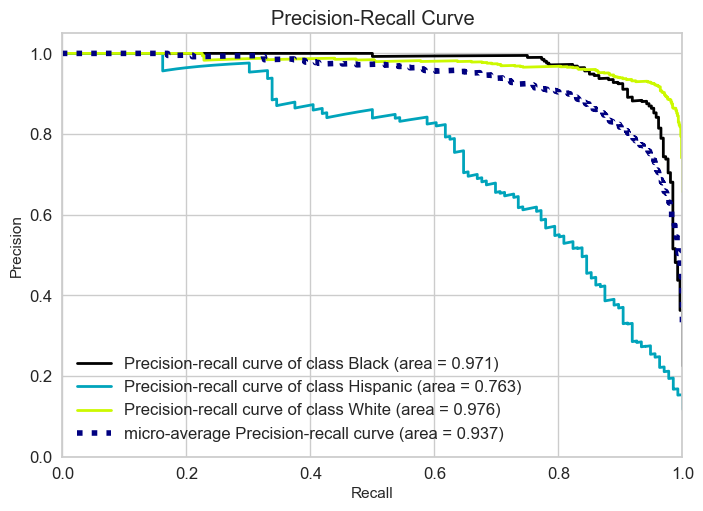

In [64]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = log_pipe.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Logistic Model GridsearchCV

In [65]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [66]:
param_grid = {
    "log__C": [0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [67]:
operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [68]:
log_model_grid.fit(X_train,y_train)

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [69]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [70]:
pd.DataFrame(log_model_grid.cv_results_).loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.773333
mean_train_score    0.838753
Name: 7, dtype: object

In [71]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



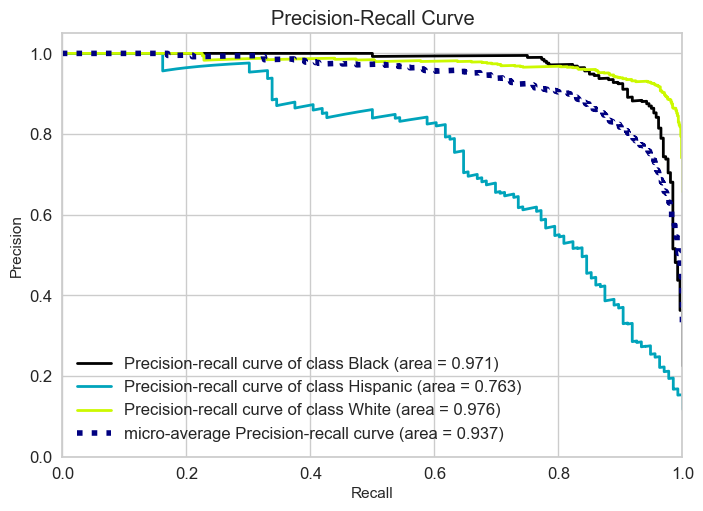

In [73]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [74]:
from sklearn.metrics import matthews_corrcoef

y_pred = log_model_grid.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# dengesiz verisetlerinde accuracy güvenilmez bir metrictir. Bu sebeple dengesiz ver setlerinin accuracy'de denen 
# matthews_corrcoef ve cohen_kappa_score kullanılabilir.

0.7536853614697057

In [75]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7449913956693838

### Coefficients

In [79]:
coef = log_model_grid.best_estimator_.named_steps['log'].coef_[0]
formatted_coef = np.array2string(coef, formatter={'float_kind':lambda x: "%.2f" % x})
print(formatted_coef)

[0.85 -0.85 1.38 -0.24 0.23 -0.03 -0.24 0.67 -0.08 0.49 0.65 -0.01 -0.04
 0.40 0.00 -0.01 -0.31 0.02 -0.03 -0.28 0.02 -0.08 -0.11 -0.29 -0.16 -0.32
 -0.15 -0.23 -0.29 -0.00 0.40 -1.47 -0.32 -0.01 -0.51 0.92 0.44 -0.08
 -0.86 0.82 0.68 0.28 0.39 0.08 -0.04 0.99 1.00 0.21 -1.07 -0.00 -0.20
 -0.11 0.37 -0.51 -0.00 -0.04 -0.03 0.03 0.13 0.86 -0.06 0.04 -0.11 0.07
 -0.02 0.46 0.84 -0.23 0.61 -0.13 -0.97 0.55 -0.80 1.32 -0.06 -0.23 -0.08
 0.27 -0.00 0.17 -0.41 -0.19 -0.00 -0.59 -0.00 -0.34 0.31 1.26 -0.25 0.49
 -0.57 -0.52 -0.35 -1.05 -0.29 -0.19 -0.10 -0.02 -0.19 -1.86 -0.64 -0.01
 -0.24 0.22 0.01 -0.07 -0.05 -0.55 1.26 -0.35 -0.00 0.10 0.04 0.24 -0.14
 0.01 -0.45 -0.01 0.81 -0.09 0.13 0.14 -0.36 -0.23 -0.20 0.13 0.36 0.62
 -0.30 -0.48 0.02 0.15 -0.17 0.11 -0.59 -0.65 -2.07 0.21 -0.88 0.24 0.54
 1.64 -2.62 0.66 -1.14 2.61 -1.54 -0.45 0.09 1.60 1.73 1.78 1.42 -0.62
 -0.47 -1.12 -1.17 -1.76 -0.74 0.99 -0.43 -0.37 -0.29 -1.50 -1.17 -0.07
 -1.60 0.09 0.47 0.68 1.55 -0.82 1.72 -0.09 -0.29 -0.36 

### LogisticRegression Optuna

#### Optuna F1

In [794]:
import optuna
from sklearn.utils import class_weight

# Define the scoring metrics
scoring = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=["Hispanic"]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"])
}

# Define the hyperparameters to optimize
def objective(trial):
    params = {
        "penalty": trial.suggest_categorical("penalty", ["l2"]),
        "C": trial.suggest_loguniform("C", 1e-4, 100),
        "solver": trial.suggest_categorical("solver", ["lbfgs", "liblinear", "saga"]),
        #"multi_class": "multinomial",
        "class_weight": 'balanced',
        'max_iter': 10000,
        'random_state': 101
    }
    operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(**params))]

    model = Pipeline(steps=operations)

    scores = cross_validate(model,
                            X_train, 
                            y_train, 
                            scoring=scoring,
                            cv=5,
                            return_train_score=True)
    df_scores = pd.DataFrame(scores, index = range(1, 6))
    f1 = scores["test_f1_Hispanic"].mean()
    return f1

# Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and score
print("Best score:", study.best_value)
print("Best params:", study.best_params)

[I 2023-04-14 03:17:39,341] A new study created in memory with name: no-name-3e8605d2-0c3b-43ed-94cd-c76222a83613
[I 2023-04-14 03:17:43,621] Trial 0 finished with value: 0.41486927211194946 and parameters: {'penalty': 'l2', 'C': 0.00271604905310103, 'solver': 'saga'}. Best is trial 0 with value: 0.41486927211194946.
[I 2023-04-14 03:17:45,430] Trial 1 finished with value: 0.0 and parameters: {'penalty': 'l2', 'C': 0.00014403231967442288, 'solver': 'liblinear'}. Best is trial 0 with value: 0.41486927211194946.
[I 2023-04-14 03:17:48,213] Trial 2 finished with value: 0.6293770704030683 and parameters: {'penalty': 'l2', 'C': 0.19881521089530174, 'solver': 'liblinear'}. Best is trial 2 with value: 0.6293770704030683.
[I 2023-04-14 03:18:04,462] Trial 3 finished with value: 0.6025136863461091 and parameters: {'penalty': 'l2', 'C': 11.088905779243493, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.6293770704030683.
[I 2023-04-14 03:18:12,622] Trial 4 finished with value: 0.57735850698384

Best score: 0.6608819463881227
Best params: {'penalty': 'l2', 'C': 1.3797619833008363, 'solver': 'liblinear'}


In [81]:
log_param_optuna = {'penalty': 'l2', 'C': 1.3797619833008363, 'solver': 'liblinear',"class_weight": 'balanced','max_iter': 10000, 'random_state': 101}
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(**log_param_optuna))]
log_pipe_optuna = Pipeline(steps=operations) # pipeline for logistic regression

In [82]:
log_pipe_optuna.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1.3797619833008363,
                                    class_weight='balanced', max_iter=10000,
                                    random_state=101, solver='liblinear'))])

In [83]:
eval_metric(log_pipe_optuna, X_train, y_train, X_test, y_test)

Test_Set
[[243   4  13]
 [  6  95  35]
 [ 19  37 702]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       260
    Hispanic       0.70      0.70      0.70       136
       White       0.94      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 972   18   48]
 [  30  380  133]
 [  44  139 2851]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.71      0.70      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



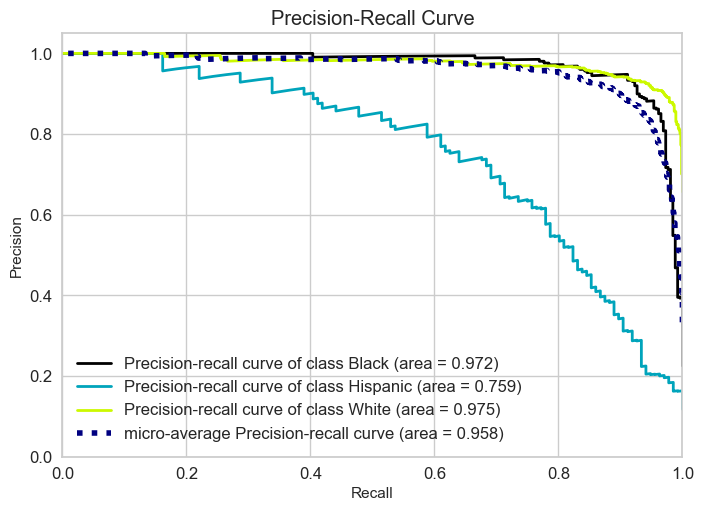

In [84]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = log_pipe_optuna.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [85]:
from sklearn.metrics import matthews_corrcoef

y_pred = log_pipe_optuna.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# dengesiz verisetlerinde accuracy güvenilmez bir metrictir. Bu sebeple dengesiz ver setlerinin accuracy'de denen 
# matthews_corrcoef ve cohen_kappa_score kullanılabilir.

0.8052036896853849

In [86]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.8051137710357905

#### Optuna Recall

In [1077]:
import optuna
from sklearn.utils import class_weight

# Define the scoring metrics
scoring = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=["Hispanic"]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"])
}

# Compute class weights
class_weights = class_weight.compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

# Define the hyperparameters to optimize
def objective(trial):
    params = {
        "penalty": trial.suggest_categorical("penalty", ["l2"]),
        "C": trial.suggest_loguniform("C", 0.1, 5),
        "solver": trial.suggest_categorical("solver", ["lbfgs", "liblinear"]),
        #"multi_class": "multinomial",
        "class_weight": 'balanced', #class_weights
        'max_iter': 10000,
        'random_state': 101
    }
    operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(**params))]

    model = Pipeline(steps=operations)

    scores = cross_validate(model,
                            X_train, 
                            y_train, 
                            scoring=scoring,
                            cv=5,
                            return_train_score=True)
    df_scores = pd.DataFrame(scores, index = range(1, 6))
    recall = scores["test_recall_Hispanic"].mean()
    return recall

# Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and score
print("Best score:", study.best_value)
print("Best params:", study.best_params)

[I 2023-04-16 03:42:58,415] A new study created in memory with name: no-name-c534b4f4-7545-44ae-8fcf-3df26e11d063
[I 2023-04-16 03:43:02,828] Trial 0 finished with value: 0.6040095141012572 and parameters: {'penalty': 'l2', 'C': 0.2862850194748198, 'solver': 'liblinear'}. Best is trial 0 with value: 0.6040095141012572.
[I 2023-04-16 03:43:06,977] Trial 1 finished with value: 0.6537376826367652 and parameters: {'penalty': 'l2', 'C': 2.7435861607660117, 'solver': 'liblinear'}. Best is trial 1 with value: 0.6537376826367652.
[I 2023-04-16 03:43:10,298] Trial 2 finished with value: 0.631651376146789 and parameters: {'penalty': 'l2', 'C': 0.7143985401429952, 'solver': 'liblinear'}. Best is trial 1 with value: 0.6537376826367652.
[I 2023-04-16 03:43:13,864] Trial 3 finished with value: 0.6408426775399253 and parameters: {'penalty': 'l2', 'C': 1.6303865481177529, 'solver': 'liblinear'}. Best is trial 1 with value: 0.6537376826367652.
[I 2023-04-16 03:43:27,410] Trial 4 finished with value: 0.

Best score: 0.777081209650017
Best params: {'penalty': 'l2', 'C': 0.4706609386283312, 'solver': 'lbfgs'}


In [87]:
log_param_optuna_recall = {'penalty': 'l2', 'C': 0.4706609386283312, 'solver': 'lbfgs',"class_weight": 'balanced','max_iter': 10000, 'random_state': 101} #0.4050837564280444
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(**log_param_optuna_recall))]
log_pipe_optuna2 = Pipeline(steps=operations) # pipeline for logistic regression

In [88]:
log_pipe_optuna2.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=0.4706609386283312,
                                    class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [89]:
eval_metric(log_pipe_optuna2, X_train, y_train, X_test, y_test)

Test_Set
[[237  15   8]
 [  5 112  19]
 [ 26  94 638]]
              precision    recall  f1-score   support

       Black       0.88      0.91      0.90       260
    Hispanic       0.51      0.82      0.63       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 966   38   34]
 [  24  448   71]
 [  57  376 2601]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.52      0.83      0.64       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



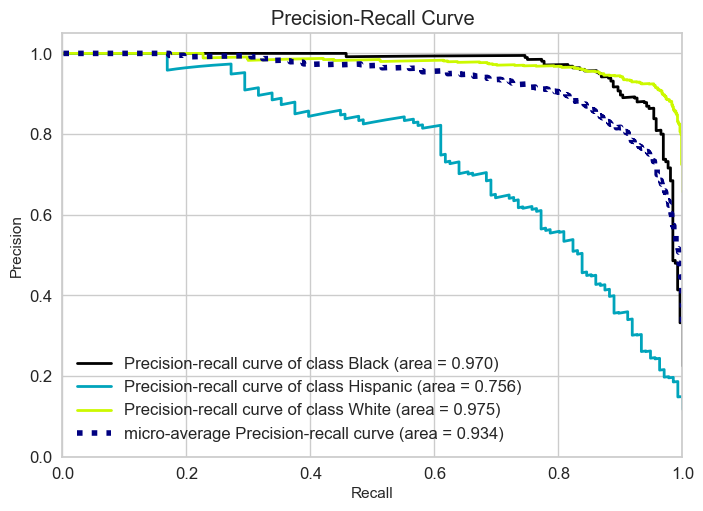

In [90]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = log_pipe_optuna2.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [91]:
from sklearn.metrics import matthews_corrcoef

y_pred = log_pipe_optuna2.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# dengesiz verisetlerinde accuracy güvenilmez bir metrictir. Bu sebeple dengesiz ver setlerinin accuracy'de denen 
# matthews_corrcoef ve cohen_kappa_score kullanılabilir.

0.7451028082294752

In [92]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7352447417950021

### Logistic AutoML

#### Logistic AutoML recall

In [94]:
from flaml import AutoML
from flaml import tune

recall_Hispanic =  make_scorer(recall_score, greater_is_better=False, average=None, labels=[1])
# Set up the FLAML AutoML object
automl_lrl = AutoML()

from sklearn.metrics import make_scorer, f1_score, log_loss

def custom_metric(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict_proba(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = recall_Hispanic(estimator,X_val,y_val)[0]
    print(val_loss)
    y_pred = estimator.predict_proba(X_train)
    train_loss = recall_Hispanic(estimator,X_train,y_train)[0]
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

automl_settings = {
    "time_budget": 720,  # in seconds
    "task": 'classification',
    "estimator_list": ['lrl2'],
    'n_splits': 5,
    "eval_method": "cv",
    'metric': custom_metric,
    'early_stop':True,
    "custom_hp": {
        "lrl2": {
            "random_state": {
                'domain': 101,
                'init_value': 101
            },
            "max_iter": {
                'domain': 10000,
                'init_value': 10000
            },
            "class_weight": {
                'domain': 'balanced',
                'init_value': 'balanced'
            },
            'solver' : {
                'domain': tune.choice(["liblinear", "lbfgs"]),
                'init_value': 'liblinear'
            }
        }
    }
}
pipeline_settings = {
    f"automl__{key}": value for key, value in automl_settings.items()
}


In [95]:
operations = [("OneHotEncoder", column_trans),
              ("automl", automl_lrl)]
log_lrl = Pipeline(steps=operations) # pipeline for logistic regression

In [96]:
log_lrl.fit(X_train, y_train, **pipeline_settings)

[flaml.automl.automl: 04-22 01:25:11] {2726} INFO - task = classification
[flaml.automl.automl: 04-22 01:25:11] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 04-22 01:25:11] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-22 01:25:11] {2858} INFO - Minimizing error metric: customized metric
[flaml.automl.automl: 04-22 01:25:11] {3004} INFO - List of ML learners in AutoML Run: ['lrl2']
[flaml.automl.automl: 04-22 01:25:11] {3334} INFO - iteration 0, current learner lrl2
-0.5925925925925926
-0.7037037037037037
-0.6422018348623854
-0.5504587155963303
-0.7339449541284404
[flaml.automl.automl: 04-22 01:25:14] {3472} INFO - Estimated sufficient time budget=28664s. Estimated necessary time budget=29s.
[flaml.automl.automl: 04-22 01:25:14] {3519} INFO -  at 2.9s,	estimator lrl2's best error=-0.6206,	best estimator lrl2's best error=-0.6206
[flaml.automl.automl: 04-22 01:25:14] {3334} INFO - iteration 1, current learner lrl2
-0.7037037037037037
-0.83333333333333

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('automl',
                 AutoML(append_log=False, auto_augment=True, custom_hp={},
                        cv_score_agg_...
                        force_cancel=False, free_mem_ratio=0, hpo_method='auto',
                        keep_search_state=False, learner_selector='sample',
                        log_file_name='', log_training_metric=False,
                        log_type='better', max_iter=None, mem_thres=4294967296,
                        metric='auto', metric_constraints=[],
                        min_sample_size=10000, model_history=False,
                        n_concurrent_trials=1, n_jobs=-1, n_splits=5,
                        pred_time_limit=inf, preserve_checkpoint=True,
                        retrain_full=True, sample=True, ...))])

In [97]:
automl_lrl.best_estimator

'lrl2'

In [98]:
automl_lrl.best_config

{'C': 0.5986616600993344,
 'random_state': 101,
 'max_iter': 10000,
 'class_weight': 'balanced',
 'solver': 'lbfgs'}

In [99]:
eval_metric(log_lrl, X_train, y_train, X_test, y_test)
# datamiz dengeli accuracy skora bakabilirim.

Test_Set
[[239  14   7]
 [  5 112  19]
 [ 25  95 638]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.51      0.82      0.63       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 967   39   32]
 [  22  454   67]
 [  57  372 2605]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.52      0.84      0.64       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



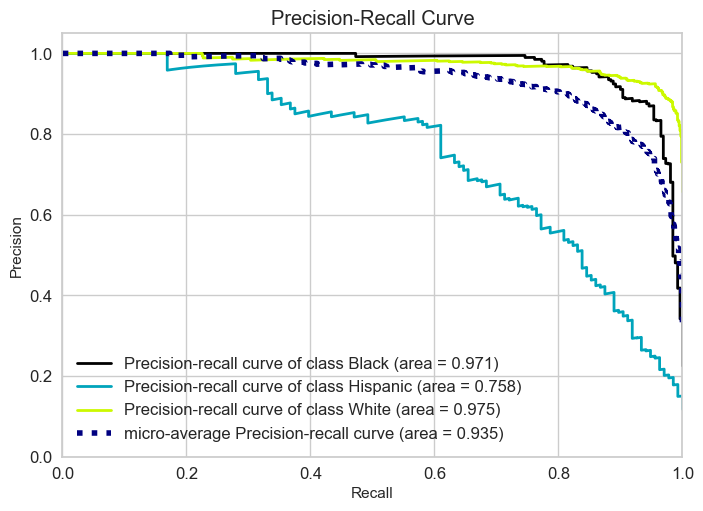

In [100]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = log_lrl.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [101]:
from sklearn.metrics import matthews_corrcoef

y_pred = log_lrl.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# dengesiz verisetlerinde accuracy güvenilmez bir metrictir. Bu sebeple dengesiz ver setlerinin accuracy'de denen 
# matthews_corrcoef ve cohen_kappa_score kullanılabilir.

0.7486238708100059

In [102]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7385943042910017

#### Logistic AutoML f1

In [103]:
from flaml import AutoML
from flaml import tune

f1_Hispanic =  make_scorer(f1_score, greater_is_better=False, average=None, labels=[1])
# Set up the FLAML AutoML object
automl_lrl2 = AutoML()

from sklearn.metrics import make_scorer, f1_score, log_loss

def custom_metric(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict_proba(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = f1_Hispanic(estimator,X_val,y_val)[0]
    print(val_loss)
    y_pred = estimator.predict_proba(X_train)
    train_loss = f1_Hispanic(estimator,X_train,y_train)[0]
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

automl_settings = {
    "time_budget": 720,  # in seconds
    "task": 'classification',
    "estimator_list": ['lrl2'],
    'n_splits': 5,
    "eval_method": "cv",
    'metric': custom_metric,
    'early_stop':True,
    "custom_hp": {
        "lrl2": {
            "random_state": {
                'domain': 101,
                'init_value': 101
            },
            "max_iter": {
                'domain': 10000,
                'init_value': 10000
            },
            "class_weight": {
                'domain': 'balanced',
                'init_value': 'balanced'
            },
            'solver' : {
                'domain': tune.choice(["liblinear", "lbfgs"]),
                'init_value': 'liblinear'
            }
        }
    }
}
pipeline_settings = {
    f"automl__{key}": value for key, value in automl_settings.items()
}


In [104]:
operations2 = [("OneHotEncoder", column_trans),
              ("automl", automl_lrl2)]
log_lrl2 = Pipeline(steps=operations2) # pipeline for logistic regression

In [105]:
log_lrl2.fit(X_train, y_train, **pipeline_settings)

[flaml.automl.automl: 04-22 14:42:45] {2726} INFO - task = classification
[flaml.automl.automl: 04-22 14:42:45] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 04-22 14:42:45] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-22 14:42:45] {2858} INFO - Minimizing error metric: customized metric
[flaml.automl.automl: 04-22 14:42:45] {3004} INFO - List of ML learners in AutoML Run: ['lrl2']
[flaml.automl.automl: 04-22 14:42:45] {3334} INFO - iteration 0, current learner lrl2
-0.5981308411214954
-0.6877828054298643
-0.6542056074766355
-0.6
-0.7207207207207207
[flaml.automl.automl: 04-22 14:42:48] {3472} INFO - Estimated sufficient time budget=28977s. Estimated necessary time budget=29s.
[flaml.automl.automl: 04-22 14:42:48] {3519} INFO -  at 3.0s,	estimator lrl2's best error=-0.6279,	best estimator lrl2's best error=-0.6279
[flaml.automl.automl: 04-22 14:42:48] {3334} INFO - iteration 1, current learner lrl2
-0.5409252669039146
-0.6428571428571428
-0.627737226

<class 'TimeoutError'> [Errno 14] <frame at 0x7fc229f95d30, file '/Users/mac/anaconda3/lib/python3.10/threading.py', line 332, code wait>


-0.0


<class 'TimeoutError'> [Errno 14] <frame at 0x7fc229f968d0, file '/Users/mac/anaconda3/lib/python3.10/threading.py', line 332, code wait>


-0.0


<class 'TimeoutError'> [Errno 14] <frame at 0x7fc20e5246c0, file '/Users/mac/anaconda3/lib/python3.10/threading.py', line 332, code wait>


-0.0
[flaml.automl.automl: 04-22 14:54:45] {3519} INFO -  at 720.5s,	estimator lrl2's best error=-0.6303,	best estimator lrl2's best error=-0.6303
[flaml.automl.automl: 04-22 14:54:46] {3783} INFO - retrain lrl2 for 0.5s
[flaml.automl.automl: 04-22 14:54:46] {3790} INFO - retrained model: LogisticRegression(C=1.2937328756295794, class_weight='balanced',
                   max_iter=10000, n_jobs=-1, random_state=101,
                   solver='liblinear')
[flaml.automl.automl: 04-22 14:54:46] {3034} INFO - fit succeeded
[flaml.automl.automl: 04-22 14:54:46] {3035} INFO - Time taken to find the best model: 635.4011151790619


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('automl',
                 AutoML(append_log=False, auto_augment=True, custom_hp={},
                        cv_score_agg_...
                        force_cancel=False, free_mem_ratio=0, hpo_method='auto',
                        keep_search_state=False, learner_selector='sample',
                        log_file_name='', log_training_metric=False,
                        log_type='better', max_iter=None, mem_thres=4294967296,
                        metric='auto', metric_constraints=[],
                        min_sample_size=10000, model_history=False,
                        n_concurrent_trials=1, n_jobs=-1, n_splits=5,
                        pred_time_limit=inf, preserve_checkpoint=True,
                        retrain_full=True, sample=True, ...))])

In [106]:
automl_lrl2.best_estimator

'lrl2'

In [107]:
automl_lrl2.best_config
# {'C': 1.2937328756295794,
#  'random_state': 101,
#  'max_iter': 10000,
#  'class_weight': 'balanced',
#  'solver': 'liblinear'}

{'C': 1.2937328756295794,
 'random_state': 101,
 'max_iter': 10000,
 'class_weight': 'balanced',
 'solver': 'liblinear'}

In [108]:
eval_metric(log_lrl2, X_train, y_train, X_test, y_test)
# datamiz dengeli accuracy skora bakabilirim.

Test_Set
[[243   4  13]
 [  6  95  35]
 [ 19  37 702]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       260
    Hispanic       0.70      0.70      0.70       136
       White       0.94      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 972   18   48]
 [  30  380  133]
 [  44  141 2849]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.71      0.70      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



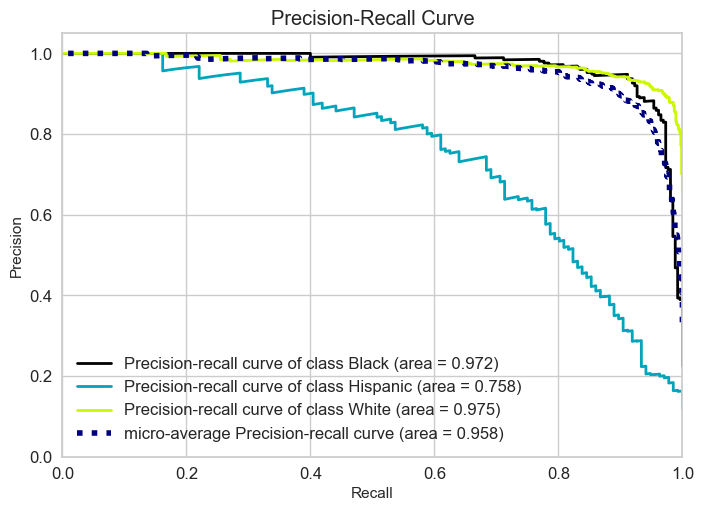

In [109]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = log_lrl2.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [110]:
from sklearn.metrics import matthews_corrcoef

y_pred = log_lrl2.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# dengesiz verisetlerinde accuracy güvenilmez bir metrictir. Bu sebeple dengesiz ver setlerinin accuracy'de denen 
# matthews_corrcoef ve cohen_kappa_score kullanılabilir.

0.8052036896853849

In [111]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.8051137710357905

### Logistic Conclusion

In [353]:
# I selected log_model_grid

from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

start_time = time.time()
y_pred = log_model_grid.predict(X_test)
end_time = time.time()
log_time = end_time - start_time

y_pred_proba = log_model_grid.predict_proba(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1]) # 0 black, 1 hispanic, 2 white skorlarını döndürür.  Burda 1 vererek hispanic skorları aldık.
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_matthews =  matthews_corrcoef(y_test, y_pred)
log_kappa = cohen_kappa_score(y_test, y_pred)


log_AP, log_f1, log_recall, log_matthews, log_kappa, log_time
# tüm modellerden aldığımız skorları aşağıda tabloda karşılaştıracağımızdan skorlarımızı değişkenlere atıyoruz.

(0.7628651644441257,
 array([0.63428571]),
 array([0.81617647]),
 0.7536853614697057,
 0.7449913956693838,
 0.13843703269958496)

## 2. SVC

### Vanilla SVC model 

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [114]:
operations = [("OneHotEncoder", column_trans), ("SVC", SVC(class_weight="balanced",random_state=101))]
svc_pipe = Pipeline(steps=operations)

In [115]:
svc_pipe.fit(X_train, y_train)
eval_metric(svc_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [116]:
operations = [("OneHotEncoder", column_trans), ("SVC", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.837268
train_accuracy           0.860407
test_precision_macro     0.766994
train_precision_macro    0.794075
test_recall_macro        0.829523
train_recall_macro       0.866864
test_f1_macro            0.783423
train_f1_macro           0.814711
dtype: float64

###  SVC Model GridsearchCV

In [117]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
# cok uzun suruyor
# param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
#               'SVC__gamma': ["scale", "auto", 0.2, 0.3],
#               'SVC__kernel': ['rbf', 'linear'],
#               'SVC__class_weight': ["balanced", None]}

param_grid = {'SVC__C': [0.5,1],
              'SVC__gamma': ["scale", "auto", 0.01]}

# Hyper-parameter uzayımızı belirliyoruz.
# class_weight dengesiz olduugu icin veriyoruz.

In [120]:
operations = [("OneHotEncoder", column_trans), ("SVC", SVC(class_weight="balanced",random_state=101))]
pipe_model = Pipeline(steps=operations)
svm_model_grid = GridSearchCV(pipe_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              cv=10, 
                              return_train_score=True,
                              n_jobs= -1,
                              verbose = 2)

# SVC predict_proba üzerinden prediction yapmaz. Tahminleri decision_function 
# üzerinden yapar. Eğer predict_proba almak istiyorsak SVC'nin probabilty 
# hyper_parametresini True olarak düzenlememiz gerekiyor.
# diyabetli olanlari en iyi sekilde tesbit etmek istedigimiz icin recall i sectik


In [121]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 

[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  11.1s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  11.4s
[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  11.5s
[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  11.4s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  11.8s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  11.6s
[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  11.3s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  11.4s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  10.6s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .......................SVC__C=0.5, SVC__gamma=scale; total time=  10.5s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  14.5s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  14.7s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  16.2s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  16.0s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  15.1s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  14.3s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  16.7s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  16.5s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  15.6s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=auto; total time=  14.4s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  14.5s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  14.7s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  14.2s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  13.2s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  16.8s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  16.4s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  14.0s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  13.3s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  14.1s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   9.0s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ........................SVC__C=0.5, SVC__gamma=0.01; total time=  14.7s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   8.6s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   9.5s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   9.4s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   9.0s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   8.8s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   9.5s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   9.3s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   8.7s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END .........................SVC__C=1, SVC__gamma=scale; total time=   8.2s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  14.7s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  15.2s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  14.5s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  14.2s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  14.8s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  15.6s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  15.0s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  15.0s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  14.5s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  13.4s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=auto; total time=  15.6s
[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  14.1s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  13.3s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  13.1s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  12.3s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  12.5s


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  13.5s
[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  13.2s
[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  12.3s
[CV] END ..........................SVC__C=1, SVC__gamma=0.01; total time=  12.1s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.5, 1],
                         'SVC__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [122]:
svm_model_grid.best_estimator_
# Google Colab
#SVC(C=0.05, kernel='linear', probability=True)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('SVC', SVC(C=1, class_weight='balanced', random_state=101))])

In [123]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]
# mean_test_score     0.885811
# mean_train_score    0.895703
# Name: 25, dtype: object
#overfiting kontrolümüzü yapıyoruz.

mean_test_score     0.760404
mean_train_score    0.835275
Name: 3, dtype: object

In [125]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [126]:
operations = [("OneHotEncoder", column_trans), 
              ("SVC", SVC(C=1, class_weight='balanced', random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision_macro','recall_macro','f1_macro'], 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# gridsearch CV sonrası extradan tekrar CV yapmaya gerek yok. 
# Ancak tüm metricleri görmek istiyorsanız tabi ki CV yapabilirsiniz

test_accuracy            0.837268
train_accuracy           0.860407
test_precision_macro     0.766994
train_precision_macro    0.794075
test_recall_macro        0.829523
train_recall_macro       0.866864
test_f1_macro            0.783423
train_f1_macro           0.814711
dtype: float64

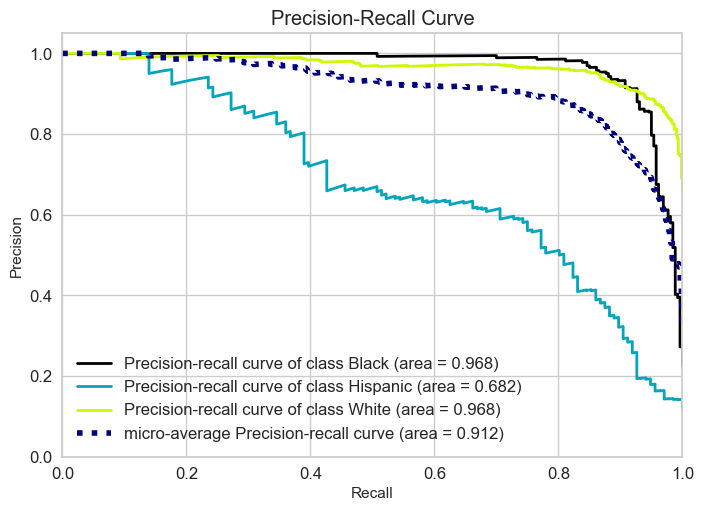

In [127]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

decision_function = svm_model_grid.decision_function(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

### Bayesian

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from skopt import gp_minimize
from skopt.space import Real, Categorical
from skopt.utils import use_named_args
from sklearn.metrics import make_scorer, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score

# Define the search space over hyperparameters
param_space = [
    Real(0.001, 1, name='C'),
    Real(0.001, 1, name='gamma'),
    Categorical(['rbf', 'linear'], name='kernel'),
    Categorical(['balanced'], name='class_weight'),
]

# Define the objective function to be maximized (recall score)
scorer = recall_Hispanic

# Define the surrogate model (Gaussian process)
@use_named_args(param_space)
def objective(**params):
    model = Pipeline([
        ("OneHotEncoder", column_trans),
        ('SVC', SVC(**params))
    ])
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    return -score.mean()

# Perform Bayesian optimization
result = gp_minimize(objective, param_space, n_calls=10, random_state=0, verbose=2)

# Print the best hyperparameters found
print("Best score: {:.4f}".format(-result.fun))
print("Best parameters: {}".format(result.x))

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 22.6501
Function value obtained: -0.5965
Current minimum: -0.5965
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 8.9610
Function value obtained: -0.7716
Current minimum: -0.7716
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 20.4800
Function value obtained: -0.6960
Current minimum: -0.7716
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 9.5289
Function value obtained: -0.7698
Current minimum: -0.7716
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 10.0499
Function value obtained: -0.7698
Current minimum: -0.7716
Iteration No: 6 starte

In [129]:
# Google Colab
# Best score: 0.8849
# Best parameters: [0.10680169958060437, 0.4741268189273109, 'linear', None]

In [130]:
operations = [("OneHotEncoder", column_trans), ("SVC", SVC(C=0.10680169958060437, gamma= 0.4741268189273109, class_weight="balanced",random_state=101, kernel='linear'))]
svc_pipe_bayesian = Pipeline(steps=operations)

In [131]:
svc_pipe_bayesian.fit(X_train, y_train)
eval_metric(svc_pipe_bayesian, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  3 112  21]
 [ 19 108 631]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.48      0.82      0.61       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 941   52   45]
 [  27  443   73]
 [  61  430 2543]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91      1038
    Hispanic       0.48      0.82      0.60       543
       White       0.96      0.84      0.89      3034

    accuracy                           0.85      4615
   macro avg       0.78      0.85      0.80      4615
weighted avg       0.89      0.85      0.86      4615



### Precision-Recall Display

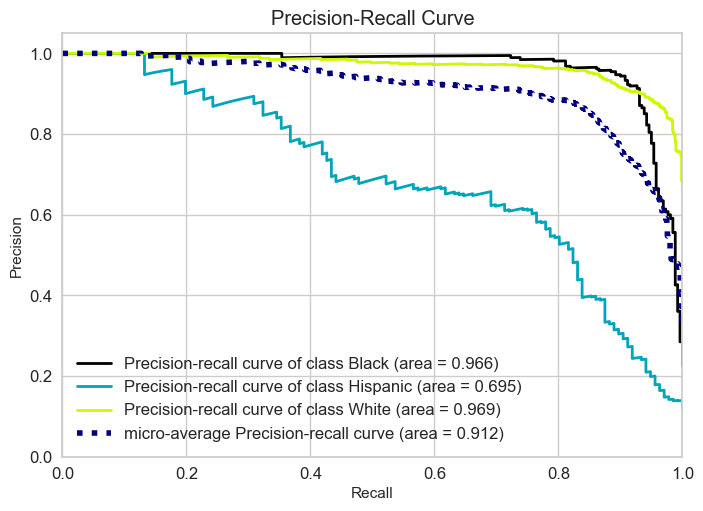

In [132]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

decision_function = svc_pipe_bayesian.decision_function(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

### SVC Conclusion


In [354]:
# I selected svc_pipe_bayesian

from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

start_time = time.time()
y_pred = svc_pipe_bayesian.predict(X_test)
end_time = time.time()
svm_time = end_time - start_time

y_pred_proba = svc_pipe_bayesian.decision_function(X_test)

svm_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1]) # 0 black, 1 hispanic, 2 white skorlarını döndürür.  Burda 1 vererek hispanic skorları aldık.
svm_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svm_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
svm_matthews =  matthews_corrcoef(y_test, y_pred)
svm_kappa = cohen_kappa_score(y_test, y_pred)


svm_AP, svm_f1, svm_recall, svm_matthews, svm_kappa, svm_time

(0.694954682659515,
 array([0.60704607]),
 array([0.82352941]),
 0.7421733200223942,
 0.7305601144751538,
 0.7476308345794678)

## 3. RF

In [425]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [135]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                       remainder='passthrough')

### Vanilla RF Model

In [136]:
from sklearn.ensemble import RandomForestClassifier

operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                     random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [137]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)
# overfit

Test_Set
[[191   0  69]
 [ 10   6 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.75      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.59      0.59      1154
weighted avg       0.82      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [138]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.777143
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.025807
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.049538
train_f1_Hispanic           1.000000
dtype: float64

In [139]:
# Feature importance
# features = X_train.columns
# features

# pipe_model'den aldığımız yeni feature sıralaması aşağıda olduğu gibidir.

In [140]:
# rf_feature_imp = pd.DataFrame(data=rf_model.feature_importances_, 
#                               index = features, #index=X.columns
#                               columns=["Feature Importance"])

# rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
# rf_feature_imp.T

In [141]:
# ax = sns.barplot(x=rf_feature_imp["Feature Importance"], 
#                  y=rf_feature_imp.index)

# ax.bar_label(ax.containers[0],fmt="%.3f")
# plt.title("Feature Importance for Random Forest")
# plt.show()

# Görselleştiriyoruz.

### RF Model GridsearchCV

In [142]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=['Hispanic'])

In [143]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [144]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [145]:
rf_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [146]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [147]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [148]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.609582
mean_train_score    0.645955
Name: 0, dtype: object

In [149]:
rf_grid_model.best_score_

0.6095820591233435

In [150]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[174  50  36]
 [ 16  76  44]
 [ 91 244 423]]
              precision    recall  f1-score   support

       Black       0.62      0.67      0.64       260
    Hispanic       0.21      0.56      0.30       136
       White       0.84      0.56      0.67       758

    accuracy                           0.58      1154
   macro avg       0.56      0.60      0.54      1154
weighted avg       0.72      0.58      0.62      1154


Train_Set
[[ 702  204  132]
 [  45  346  152]
 [ 246 1105 1683]]
              precision    recall  f1-score   support

       Black       0.71      0.68      0.69      1038
    Hispanic       0.21      0.64      0.31       543
       White       0.86      0.55      0.67      3034

    accuracy                           0.59      4615
   macro avg       0.59      0.62      0.56      4615
weighted avg       0.75      0.59      0.64      4615



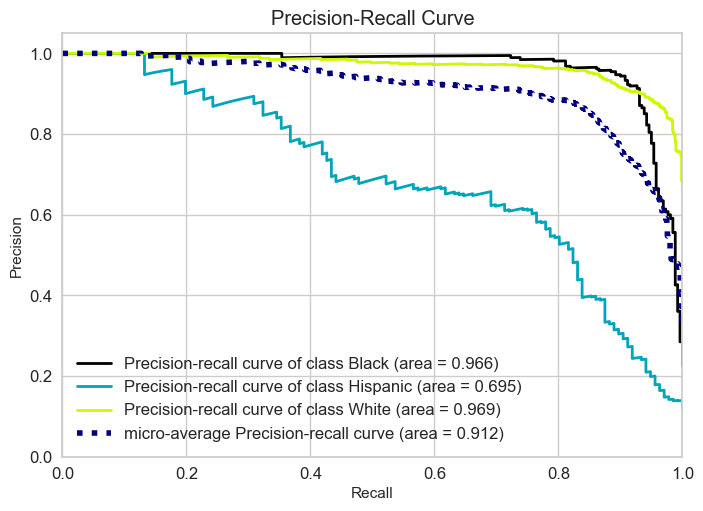

In [151]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth=2, 
                                                     n_estimators=400, 
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### RF Automl

In [152]:
from flaml import AutoML

recall_Hispanic =  make_scorer(recall_score, greater_is_better=False, average=None, labels=[1])
# Set up the FLAML AutoML object
automl_rf = AutoML()

from sklearn.metrics import make_scorer, f1_score, log_loss

def custom_metric(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict_proba(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = recall_Hispanic(estimator,X_val,y_val)[0]
    print(val_loss)
    y_pred = estimator.predict_proba(X_train)
    train_loss = recall_Hispanic(estimator,X_train,y_train)[0]
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

automl_settings_rf = {
    "time_budget": 40,  # in seconds
    "task": 'classification',
    "estimator_list": ['rf'],
    'n_splits': 5,
    "eval_method": "cv",
    'metric': 'accuracy',
    'early_stop':True,
    "custom_hp": {
        "rf": {
            "random_state": {
                'domain': 101,
                'init_value': 101
            }
            # "max_depth": {
            #     'domain': tune.choice([2, 3]),
            #     'init_value': 2
            # },
            # 'n_estimators' : {
            #     'domain': tune.randint(400, 500),
            #     'init_value': 450
            # }
        }
    }
}

pipeline_settings_rf = {
    f"automl__{key}": value for key, value in automl_settings_rf.items()
}

operations_rf_automl = [("OrdinalEncoder", column_trans), 
                 ("automl", automl_rf)]

pipe_model_rf = Pipeline(steps=operations_rf_automl)

pipe_model_rf.fit(X_train, y_train, **pipeline_settings_rf)

[flaml.automl.automl: 04-22 15:12:07] {2726} INFO - task = classification
[flaml.automl.automl: 04-22 15:12:07] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 04-22 15:12:07] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-22 15:12:07] {2858} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 04-22 15:12:07] {3004} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.automl: 04-22 15:12:07] {3334} INFO - iteration 0, current learner rf
[flaml.automl.automl: 04-22 15:12:07] {3472} INFO - Estimated sufficient time budget=5881s. Estimated necessary time budget=6s.
[flaml.automl.automl: 04-22 15:12:07] {3519} INFO -  at 0.6s,	estimator rf's best error=0.3367,	best estimator rf's best error=0.3367
[flaml.automl.automl: 04-22 15:12:07] {3334} INFO - iteration 1, current learner rf
[flaml.automl.automl: 04-22 15:12:08] {3519} INFO -  at 1.2s,	estimator rf's best error=0.2787,	best estimator rf's best error=0.2787
[flaml.automl.automl: 04

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('automl',
                 AutoML(append_log=False, auto_augment=True, custom_hp={},
                        cv_score_agg_func=None, early...
                        force_cancel=False, free_mem_ratio=0, hpo_method='auto',
                        keep_search_state=False, learner_selector='sample',
                        log_file_name='', log_training_metric=False,
                        log_type='better', max_iter=None, mem_thres=4294967296,
                        metric='auto', metric_constraints=[],
                        min_sample_size=10000, model_history=False,
                        n_concurrent_trials=1, n_jobs=-1, n_splits=5,
                        pred_time_limit=inf, preserve_checkpoint=True,
                        retrain_full=True, sample=True, ...))])

In [153]:
automl_rf.best_estimator

'rf'

In [154]:
automl_rf.best_config

{'n_estimators': 25,
 'max_features': 0.2368255790924017,
 'max_leaves': 151,
 'random_state': 101,
 'criterion': 'entropy'}

In [155]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)
# datamiz dengeli accuracy skora bakabilirim.

Test_Set
[[205   2  53]
 [ 13   5 118]
 [ 18   3 737]]
              precision    recall  f1-score   support

       Black       0.87      0.79      0.83       260
    Hispanic       0.50      0.04      0.07       136
       White       0.81      0.97      0.88       758

    accuracy                           0.82      1154
   macro avg       0.73      0.60      0.59      1154
weighted avg       0.79      0.82      0.78      1154


Train_Set
[[ 954    0   84]
 [  31  199  313]
 [   7    0 3027]]
              precision    recall  f1-score   support

       Black       0.96      0.92      0.94      1038
    Hispanic       1.00      0.37      0.54       543
       White       0.88      1.00      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.95      0.76      0.80      4615
weighted avg       0.92      0.91      0.89      4615



### Precision-Recall Display

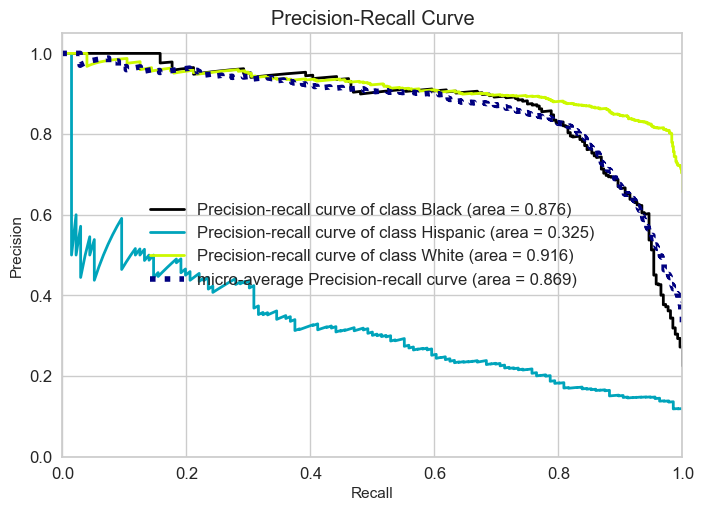

In [158]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = pipe_model_rf.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### RF Conclusion

In [355]:
# I selected rf_grid_model

start_time = time.time()
y_pred = rf_grid_model.predict(X_test)
end_time = time.time()
rf_time = end_time - start_time

y_pred_proba = rf_grid_model.predict_proba(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

rf_matthews =  matthews_corrcoef(y_test, y_pred)
rf_kappa = cohen_kappa_score(y_test, y_pred)


rf_AP, rf_f1, rf_recall, rf_matthews, rf_kappa, rf_time

(0.29502831039228344,
 array([0.30039526]),
 array([0.55882353]),
 0.35744046514694744,
 0.32886047237087424,
 0.19150996208190918)

## 4. XGBoost

### Vanilla XGBoost Model

In [160]:
import xgboost as xgb

In [161]:
y_train.unique()

array(['Hispanic', 'White', 'Black'], dtype=object)

In [162]:
y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2}) # sıralama classification_report ile aynı olacak.
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train_xgb)

# XGboost algortimasının multiclass datalar için weight_class hyper parametresi olmadığından. fit fonksiyonu içinde 
# sample_weight hyper paremetresini kullanabiliyoruz.
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)


# xgb 1.6 ve üzeri versiyonlarda target numeric olmaz ise hata döndürüyor. Bu sebeple manuel olarak dönüşümü yapıyoruz.
params_pipe_xgb = {
    'XGB_model__sample_weight': classes_weights
}

pipe_model_xgb.fit(X_train, y_train_xgb, **params_pipe_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [163]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)
# overfit

Test_Set
[[231   2  27]
 [ 11  64  61]
 [ 21  20 717]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       260
           1       0.74      0.47      0.58       136
           2       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Cross Validate

In [164]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}

# xgb targeti kategorik kabul etmiyor. Hispanik 1

In [165]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring_xgb,
                        cv=5, 
                        return_train_score=True,
                        fit_params=params_pipe_xgb)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.694862
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.427234
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.528032
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [168]:
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=make_scorer(recall_score, average = None, labels =[1]),
                              cv=5,
                              #n_jobs=-1,
                              return_train_score=True,
                              verbose = 2)


In [169]:
xgb_grid_model.fit(X_train,
                   y_train_xgb,
                   **params_pipe_xgb)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.03, XGB_model__max_depth=1, XGB_model__n_estimators=20, XGB_model__subsample=0.8; total time=   0.3s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.03, XGB_model__max_depth=1, XGB_model__n_estimators=20, XGB_model__subsample=0.8; total time=   0.3s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.03, XGB_model__max_depth=1, XGB_model__n_estimators=20, XGB_model__subsample=0.8; total time=   0.3s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.03, XGB_model__max_depth=1, XGB_model__n_estimators=20, XGB_model__subsample=0.8; total time=   0.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.03, XGB_model__max_depth=1, XGB_model__n_estimators=20, XGB_model__subsample=0.8; total time=   0.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.03, XGB_model__max_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [170]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [171]:
xgb_grid_model.best_params_
# {'xgb__colsample_bytree': 0.6,
#  'xgb__gamma': 1.5,
#  'xgb__max_depth': 5,
#  'xgb__min_child_weight': 1,
#  'xgb__subsample': 1.0}

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [172]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.565443
mean_train_score    0.648256
Name: 14, dtype: object

In [173]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[200  37  23]
 [ 17  79  40]
 [ 97 177 484]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       260
           1       0.27      0.58      0.37       136
           2       0.88      0.64      0.74       758

    accuracy                           0.66      1154
   macro avg       0.60      0.66      0.60      1154
weighted avg       0.76      0.66      0.69      1154


Train_Set
[[ 800  149   89]
 [  64  348  131]
 [ 274  699 2061]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      1038
           1       0.29      0.64      0.40       543
           2       0.90      0.68      0.78      3034

    accuracy                           0.70      4615
   macro avg       0.63      0.70      0.64      4615
weighted avg       0.79      0.70      0.72      4615



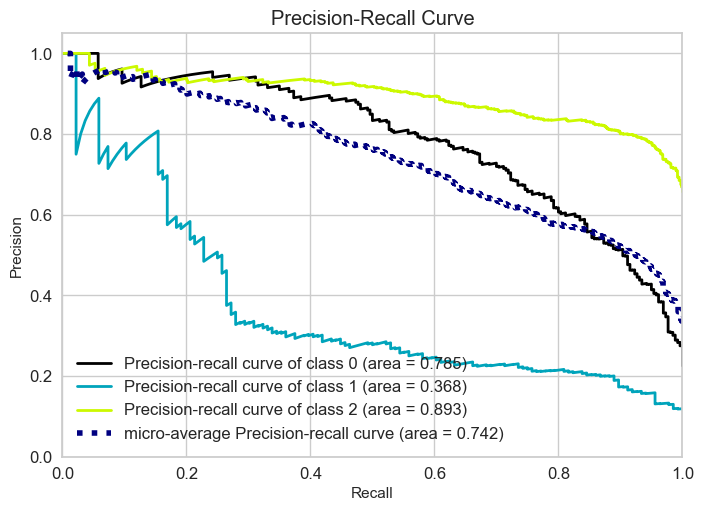

In [174]:
y_pred_proba = xgb_grid_model.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

### XGBoost AutoML

In [176]:
#recall_Hispanic = make_scorer(recall_Hispanic,average=None,labels=[1])
def custom_metric(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict_proba(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = log_loss(y_val, y_pred, labels=labels,
                         sample_weight=weight_val)
    y_pred = estimator.predict_proba(X_train)
    train_loss = log_loss(y_train, y_pred, labels=labels,
                          sample_weight=weight_train)
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

from flaml import AutoML
from flaml import tune

automl_settings_xgb = {
    "time_budget": 720,  # in seconds
    "task": 'classification',
    "estimator_list": ['xgboost'],
    'n_splits': 5,
    "eval_method": "cv",
    'metric':  custom_metric, #'accuracy',
    'early_stop':True,
    'sample_weight': classes_weights,
    'log_file_name' : 'xgb_automl.log',
    "log_training_metric": True,  # whether to log training metric
    #'starting_points': automl_xgb.best_config_per_estimator,
    "custom_hp": {
        "xgboost": {
            "max_depth": {
                'domain': tune.randint(2,4),
                'init_value': 3
            },
            # "num_leaves": {
            #     'domain': 7,
            #     'init_value': 7
            # },
            # "bagging_freq": {
            #     'domain': 5,
            #     'init_value': 5
            # },
            # "bagging_fraction": {
            #     'domain': 0.6,
            #     'init_value': 0.6
            # },
            # "log_max_bin": {
            #     'domain': 3, # tune.lograndint(lower=3, upper=7),
            #     'init_value': 3
            # },
            # "min_data_in_leaf": {
            #     'domain': tune.lograndint(lower=100, upper=300),
            #     'init_value': 150
            # },
            # "subsample": {
            #     'domain': 0.7,
            #     'init_value': 0.7
            # },
            # "learning_rate": {
            #     'domain': 0.15,
            #     'init_value': 0.15
            # },
            # "n_estimators": {
            #     'domain': tune.lograndint(lower=30, upper=100),
            #     'init_value': 30
            # },
            "seed": {
                'domain': 42,
                'init_value': 42
            }
        }
    }

}
automl_xgb = AutoML()

pipeline_settings_xgb = {
    f"automl__{key}": value for key, value in automl_settings_xgb.items()
}

operations_xgb_automl = [
    ("OrdinalEncoder", column_trans),
    ("automl", automl_xgb)
]

pipe_xgb_automl = Pipeline(steps=operations_xgb_automl)

pipe_xgb_automl.fit(X_train, y_train, **pipeline_settings_xgb)

[flaml.automl.automl: 04-22 15:21:28] {2726} INFO - task = classification
[flaml.automl.automl: 04-22 15:21:28] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 04-22 15:21:28] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-22 15:21:28] {2858} INFO - Minimizing error metric: customized metric
[flaml.automl.automl: 04-22 15:21:28] {3004} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.automl: 04-22 15:21:28] {3334} INFO - iteration 0, current learner xgboost
[flaml.automl.automl: 04-22 15:21:30] {3472} INFO - Estimated sufficient time budget=26649s. Estimated necessary time budget=27s.
[flaml.automl.automl: 04-22 15:21:30] {3519} INFO -  at 2.7s,	estimator xgboost's best error=1.0105,	best estimator xgboost's best error=1.0105
[flaml.automl.automl: 04-22 15:21:30] {3334} INFO - iteration 1, current learner xgboost
[flaml.automl.automl: 04-22 15:21:33] {3519} INFO -  at 4.8s,	estimator xgboost's best error=1.0105,	best estimator xgboost'

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('automl',
                 AutoML(append_log=False, auto_augment=True, custom_hp={},
                        cv_score_agg_func=None, early...
                        force_cancel=False, free_mem_ratio=0, hpo_method='auto',
                        keep_search_state=False, learner_selector='sample',
                        log_file_name='', log_training_metric=False,
                        log_type='better', max_iter=None, mem_thres=4294967296,
                        metric='auto', metric_constraints=[],
                        min_sample_size=10000, model_history=False,
                        n_concurrent_trials=1, n_jobs=-1, n_splits=5,
                        pred_time_limit=inf, preserve_checkpoint=True,
                        retrain_full=True, sample=True, ...))])

In [177]:
automl_xgb.best_estimator

'xgboost'

In [178]:
automl_xgb.best_config

{'n_estimators': 55,
 'max_leaves': 9,
 'min_child_weight': 0.005047620344377755,
 'learning_rate': 0.2074457841093521,
 'subsample': 1.0,
 'colsample_bylevel': 0.8442499456677137,
 'colsample_bytree': 0.931693159985084,
 'reg_alpha': 0.0012576316623905584,
 'reg_lambda': 4.888350215522261,
 'max_depth': 3,
 'seed': 42}

In [179]:
eval_metric(pipe_xgb_automl, X_train, y_train, X_test, y_test)
# datamiz dengeli accuracy skora bakabilirim.

Test_Set
[[228  14  18]
 [  9  88  39]
 [ 39  98 621]]
              precision    recall  f1-score   support

       Black       0.83      0.88      0.85       260
    Hispanic       0.44      0.65      0.52       136
       White       0.92      0.82      0.86       758

    accuracy                           0.81      1154
   macro avg       0.73      0.78      0.75      1154
weighted avg       0.84      0.81      0.82      1154


Train_Set
[[ 974   32   32]
 [  16  466   61]
 [  80  312 2642]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1038
    Hispanic       0.58      0.86      0.69       543
       White       0.97      0.87      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



### Precision-Recall Display

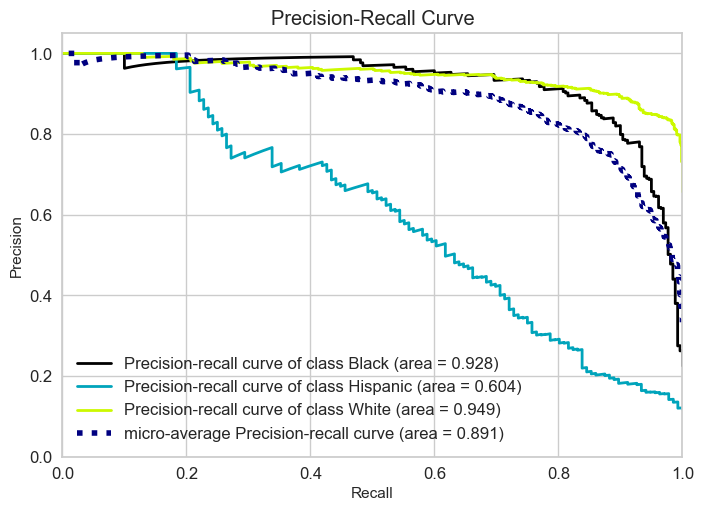

In [180]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = pipe_xgb_automl.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### XGBoost Conclusion

In [181]:
y_pred

array(['White', 'Hispanic', 'Hispanic', ..., 'Hispanic', 'Hispanic',
       'White'], dtype=object)

In [356]:
# I selected pipe_xgb_automl
start_time = time.time()
y_pred = pipe_xgb_automl.predict(X_test)
end_time = time.time()
xgb_time = end_time - start_time

y_pred_proba = pipe_xgb_automl.predict_proba(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

xgb_matthews =  matthews_corrcoef(y_test, y_pred)
xgb_kappa = cohen_kappa_score(y_test, y_pred)


xgb_AP, xgb_f1, xgb_recall, xgb_matthews, xgb_kappa, xgb_time

(0.604495464584559,
 array([0.52380952]),
 array([0.64705882]),
 0.6577047107962326,
 0.6516320920604537,
 0.12955904006958008)

## LightGBM

### Vanilla LightGBM Model

In [183]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [184]:
df_np = df.copy()

In [185]:
# Converting pyarrow to numpy
int_cols = df_np.select_dtypes(include=['int64[pyarrow]']).columns

# Convert the integer columns to float
df_np[int_cols] = df_np[int_cols].astype(np.float64)

str_cols = df_np.select_dtypes(include=['string[pyarrow]']).columns

# Convert the integer columns to float
df_np[str_cols] = df_np[str_cols].astype('category')

In [186]:
X_lgbm =df_np.drop([y_name], axis=1)
y_lgbm =df_np[y_name]
X_train_lgbm , X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X_lgbm, y_lgbm, test_size=0.2, stratify=y_lgbm, random_state=101)

In [187]:
lgbm_features = X_train_lgbm.select_dtypes(include=['category']).columns.tolist()

In [188]:
lgbm_features

['Gender', 'SubjectsBirthLocation', 'WritingPreference']

In [189]:
params_pipe_lgbm = {
    'LGBM_model__early_stopping_rounds': 10,
    'LGBM_model__eval_set': [(X_test_lgbm, y_test_lgbm)],
    'LGBM_model__eval_metric': 'multi_logloss',
}

operations_lgbm = [("LGBM_model", LGBMClassifier(objective='multiclass', num_class=3, random_state=42, class_weight='balanced', cat_col = lgbm_features))]

pipe_model_lgbm = Pipeline(steps=operations_lgbm)

pipe_model_lgbm.fit(X_train_lgbm, y_train_lgbm, **params_pipe_lgbm)

[LightGBM] [Warning] Unknown parameter: cat_col
[1]	valid_0's multi_logloss: 1.02099
[2]	valid_0's multi_logloss: 0.9597
[3]	valid_0's multi_logloss: 0.9069
[4]	valid_0's multi_logloss: 0.863369
[5]	valid_0's multi_logloss: 0.820554
[6]	valid_0's multi_logloss: 0.78529
[7]	valid_0's multi_logloss: 0.7524
[8]	valid_0's multi_logloss: 0.725612
[9]	valid_0's multi_logloss: 0.699944
[10]	valid_0's multi_logloss: 0.676441
[11]	valid_0's multi_logloss: 0.657039
[12]	valid_0's multi_logloss: 0.637635
[13]	valid_0's multi_logloss: 0.620373
[14]	valid_0's multi_logloss: 0.604653
[15]	valid_0's multi_logloss: 0.589846
[16]	valid_0's multi_logloss: 0.576181
[17]	valid_0's multi_logloss: 0.565024
[18]	valid_0's multi_logloss: 0.550694
[19]	valid_0's multi_logloss: 0.539262
[20]	valid_0's multi_logloss: 0.52715
[21]	valid_0's multi_logloss: 0.51803
[22]	valid_0's multi_logloss: 0.506443
[23]	valid_0's multi_logloss: 0.49758
[24]	valid_0's multi_logloss: 0.488562
[25]	valid_0's multi_logloss: 0.4796

Pipeline(steps=[('LGBM_model',
                 LGBMClassifier(cat_col=['Gender', 'SubjectsBirthLocation',
                                         'WritingPreference'],
                                class_weight='balanced', num_class=3,
                                objective='multiclass', random_state=42))])

In [190]:
eval_metric(pipe_model_lgbm, X_train_lgbm, y_train_lgbm, X_test_lgbm, y_test_lgbm)
# overfit

Test_Set
[[232   5  23]
 [  7  79  50]
 [ 22  27 709]]
              precision    recall  f1-score   support

       Black       0.89      0.89      0.89       260
    Hispanic       0.71      0.58      0.64       136
       White       0.91      0.94      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.80      0.82      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    1 3033]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Cross Validate

In [191]:
from sklearn.model_selection import cross_val_score, cross_validate

In [192]:
operations_lgbm = [("OrdinalEncoder", column_trans), 
                  ("LGBM_model", LGBMClassifier(objective='multiclass', num_class=3, random_state=42, class_weight='balanced'))]

model = Pipeline(steps=operations_lgbm)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# overfit

test_accuracy            0.875836
train_accuracy           1.000000
test_precision_macro     0.821009
train_precision_macro    1.000000
test_recall_macro        0.770966
train_recall_macro       1.000000
test_f1_macro            0.790311
train_f1_macro           1.000000
dtype: float64

### LightGBM Gridsearch

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
operations_lgbm = [("OrdinalEncoder", column_trans), 
                  ("LGBM_model", LGBMClassifier(objective='multiclass', num_class=3, random_state=42, class_weight='balanced'))]

pipe_model_lgbm2 = Pipeline(steps=operations_lgbm)

param_grid = {
    'LGBM_model__learning_rate': [0.01, 0.05, 0.1],
    #'lgbm__max_depth': [3, 5, 7],
    'LGBM_model__n_estimators': [50, 100, 200]
}


In [195]:
lgbm_grid_model = GridSearchCV(pipe_model_lgbm2, param_grid, cv=10, return_train_score=True, n_jobs = -1, verbose = 2)

In [196]:
lgbm_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.3s
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.4s
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.4s
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.4s
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.2s
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.3s
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.3s
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.5s
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.3s
[CV] END LGBM_model__learning_rate=0.01, LGBM_model__n_estimators=50; total time=   2.3s
[CV] END LGBM_model__learning_rate=0.01, LGBM_mod

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('LGBM_model',
                                        LGBMClassifier(class_weight='balanced',
                                                       num_class=3,
                                                       objective='multiclass',
                                                       random_state=42))]),
             n_jobs=-1,
             param_grid={'LGBM_model__learning_rate': [0.01, 0.05, 0.1],
                         'LGBM_model__n_estimators': [50, 100, 200]},
             return_train_score=True, verbose=2)

In [197]:
lgbm_grid_model.best_estimator_
# GridsearchCV herzaman en düşük error scorunu verecek olan maximum metric 
# scorunu döndürür. GridsearchCV sonrası bulacağımız n_neighbors sayısı 
# çok maaliyetli olabileceğinden elbow metoduyla seçmek best practicedir.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('LGBM_model',
                 LGBMClassifier(class_weight='balanced', n_estimators=200,
                                num_class=3, objective='multiclass',
                                random_state=42))])

In [198]:
lgbm_grid_model.best_params_


{'LGBM_model__learning_rate': 0.1, 'LGBM_model__n_estimators': 200}

In [199]:
pd.DataFrame(lgbm_grid_model.cv_results_).loc[lgbm_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.882554
mean_train_score         1.0
Name: 8, dtype: object

In [200]:
eval_metric(lgbm_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[234   1  25]
 [  8  61  67]
 [ 23  14 721]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       260
    Hispanic       0.80      0.45      0.58       136
       White       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.86      0.77      0.79      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### LightGBM AutoML

In [201]:
lgbm_features

['Gender', 'SubjectsBirthLocation', 'WritingPreference']

In [211]:
starting_point_lgbm = {'lgbm':{'n_estimators': 55,
 'num_leaves': 8,
 'min_child_samples': 2,
 'learning_rate': 0.2490924964780081,
 'log_max_bin': 3,
 'colsample_bytree': 0.5794362470909863,
 'reg_alpha': 1.1414827208328986,
 'reg_lambda': 0.0009765625,
 'random_state': 42,
 'class_weight': 'balanced',
 'objective': 'multiclass',
 'num_class': 3,
 'categorical_feature': ['Gender',
  'SubjectsBirthLocation',
  'WritingPreference'],
 'subsample': 0.8}
}

In [213]:
def get_starting_points_lgbm():
    try:
        return automl_lgbm.best_config_per_estimator
    except:
        return starting_point_lgbm

In [395]:
get_starting_points_lgbm()

{'lgbm': {'n_estimators': 149,
  'num_leaves': 4,
  'min_child_samples': 4,
  'learning_rate': 0.4008314003666693,
  'log_max_bin': 3,
  'colsample_bytree': 0.8274762203936349,
  'reg_alpha': 0.0009765625,
  'reg_lambda': 150.54144932789612,
  'random_state': 42,
  'class_weight': 'balanced',
  'objective': 'multiclass',
  'num_class': 3,
  'categorical_feature': ['Gender',
   'SubjectsBirthLocation',
   'WritingPreference'],
  'subsample': 0.8}}

In [296]:
recall_Hispanic = make_scorer(recall_Hispanic,average=None,labels=[1])
def custom_metric(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict_proba(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = log_loss(y_val, y_pred, labels=labels,
                         sample_weight=weight_val)
    # print(y_val)
    # print(y_pred)
    # print(recall_score(y_val, estimator.predict(X_val), labels=[1], average=None, sample_weight=weight_val))
    y_pred = estimator.predict_proba(X_train)
    train_loss = log_loss(y_train, y_pred, labels=labels,
                          sample_weight=weight_train)
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

def custom_metric2(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = 1 - f1_score(y_val, y_pred, labels=[1], average=None, sample_weight=weight_val)[0]
    # print(y_val)
    # print(y_pred)
    # print()
    y_pred = estimator.predict(X_train)
    train_loss = 1 - f1_score(y_train, y_pred, labels=[1], average=None, sample_weight=weight_train)[0]
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

from flaml import AutoML
from flaml import tune

automl_settings_lgbm = {
    "time_budget": 120,  # in seconds
    "task": 'classification',
    "estimator_list": ['lgbm'],
    'n_splits': 5,
    "eval_method": "cv",
    'metric': custom_metric,  #'macro_f1', #'accuracy',
    'early_stop':True,
    'log_file_name' : 'lgbm_automl.log',
    "log_training_metric": True,  # whether to log training metric
    'starting_points': get_starting_points_lgbm(),
    "custom_hp": {
        "lgbm": {
            # "max_depth": {
            #     'domain': tune.lograndint(lower=3, upper=4),
            #     'init_value': 3
            # },
            # "num_leaves": {
            #     'domain': 7,
            #     'init_value': 7
            # },
            # "bagging_freq": {
            #     'domain': 5,
            #     'init_value': 5
            # },
            # "bagging_fraction": {
            #     'domain': 0.6,
            #     'init_value': 0.6
            # },
            "log_max_bin": {
                'domain': tune.randint(lower=3, upper=6),
                'init_value': 3
            },
            # "min_data_in_leaf": {
            #     'domain': tune.lograndint(lower=100, upper=300),
            #     'init_value': 150
            # },
            # "learning_rate": {
            #     'domain': 0.15,
            #     'init_value': 0.15
            # },
            "n_estimators": {
                'domain': tune.lograndint(lower=30, upper=150),
                'init_value': 30
            },
            "random_state": {
                'domain': 42,
                'init_value': 42
            },
            'class_weight': {
                'domain': 'balanced'
            },
            'objective': {
                'domain' : 'multiclass'
            },
            'num_class': {
                'domain' : 3
            },
            'categorical_feature':{
                'domain' : lgbm_features
            },
            # 'eval_set':{
            #     'domain': [(X_test_lgbm, y_test_lgbm)]
            # },
            # 'eval_metric':{
            #     'domain': 'multi_logloss'
            # },
            # 'early_stopping_rounds':{
            #     'domain': 10
            # },
            'subsample':{
                'domain': 0.8
            }
        }
    }

}
automl_lgbm = AutoML()

pipeline_settings_lgbm = {
    f"automl__{key}": value for key, value in automl_settings_lgbm.items()
}

operations_lgbm_automl = [("automl", automl_lgbm)]

pipe_lgbm_automl = Pipeline(steps=operations_lgbm_automl)

pipe_lgbm_automl.fit(X_train_lgbm, y_train_lgbm, **pipeline_settings_lgbm)

[flaml.automl.automl: 04-23 00:55:02] {2726} INFO - task = classification
[flaml.automl.automl: 04-23 00:55:02] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 04-23 00:55:02] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-23 00:55:02] {2858} INFO - Minimizing error metric: customized metric
[flaml.automl.automl: 04-23 00:55:02] {3004} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.automl: 04-23 00:55:02] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-23 00:55:04] {3472} INFO - Estimated sufficient time budget=24107s. Estimated necessary time budget=24s.
[flaml.automl.automl: 04-23 00:55:04] {3519} INFO -  at 2.8s,	estimator lgbm's best error=0.4945,	best estimator lgbm's best error=0.4945
[flaml.automl.automl: 04-23 00:55:04] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-23 00:55:06] {3519} INFO -  at 5.0s,	estimator lgbm's best error=0.4945,	best estimator lgbm's best error=0.4945
[

Pipeline(steps=[('automl',
                 AutoML(append_log=False, auto_augment=True, custom_hp={},
                        cv_score_agg_func=None, early_stop=False,
                        ensemble=False, estimator_list='auto',
                        eval_method='auto', fit_kwargs_by_estimator={},
                        force_cancel=False, free_mem_ratio=0, hpo_method='auto',
                        keep_search_state=False, learner_selector='sample',
                        log_file_name='', log_training_metric=False,
                        log_type='better', max_iter=None, mem_thres=4294967296,
                        metric='auto', metric_constraints=[],
                        min_sample_size=10000, model_history=False,
                        n_concurrent_trials=1, n_jobs=-1, n_splits=5,
                        pred_time_limit=inf, preserve_checkpoint=True,
                        retrain_full=True, sample=True, ...))])

In [291]:
automl_lgbm.best_estimator

'lgbm'

In [396]:
automl_lgbm.best_config

{'n_estimators': 149,
 'num_leaves': 4,
 'min_child_samples': 4,
 'learning_rate': 0.4008314003666693,
 'log_max_bin': 3,
 'colsample_bytree': 0.8274762203936349,
 'reg_alpha': 0.0009765625,
 'reg_lambda': 150.54144932789612,
 'random_state': 42,
 'class_weight': 'balanced',
 'objective': 'multiclass',
 'num_class': 3,
 'categorical_feature': ['Gender',
  'SubjectsBirthLocation',
  'WritingPreference'],
 'subsample': 0.8}

In [479]:
eval_metric(pipe_lgbm_automl, X_train, y_train, X_test, y_test)
# datamiz dengeli accuracy skora bakabilirim.

Test_Set
[[235  10  15]
 [  6 103  27]
 [ 35  89 634]]
              precision    recall  f1-score   support

       Black       0.85      0.90      0.88       260
    Hispanic       0.51      0.76      0.61       136
       White       0.94      0.84      0.88       758

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[ 990   23   25]
 [  14  497   32]
 [  74  254 2706]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.94      1038
    Hispanic       0.64      0.92      0.75       543
       White       0.98      0.89      0.93      3034

    accuracy                           0.91      4615
   macro avg       0.85      0.92      0.87      4615
weighted avg       0.93      0.91      0.91      4615



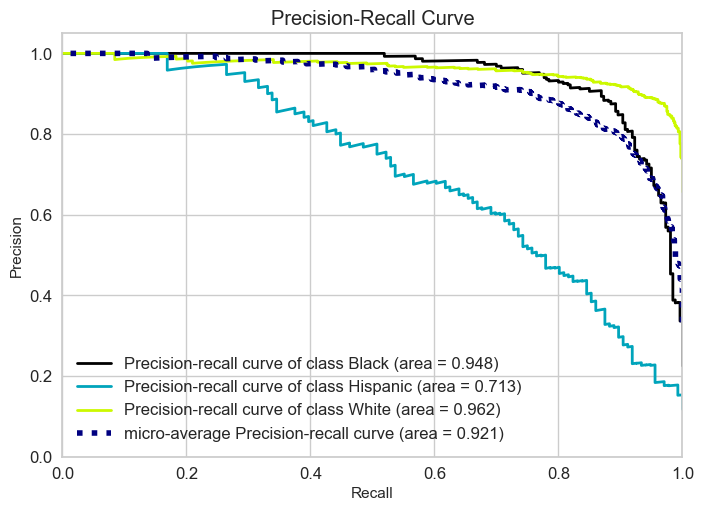

In [299]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = pipe_lgbm_automl.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### LightGBM Optuna

In [224]:
scoring = {#"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           #"recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import optuna

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters to search over
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 50),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 2, 3),
        'max_bin': trial.suggest_int('max_bin', 3, 3),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        #'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        #'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 1.0),
        #'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 2.0), for binary
        #'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced']),
        'class_weight' : 'balanced',
        'categorical_feature': lgbm_features,
        'objective':'multiclass', 
        'num_class' : 3,
        'random_state': 42,
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.7, 0.8), # use 80% of the data for each tree
        'bagging_freq': trial.suggest_int('bagging_freq', 5, 10), # use bagging every 5 iterations
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.7, 0.8),
        #'verbose' : 500
    }

    # params = {
    #     'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
    #     'n_estimators': trial.suggest_int('n_estimators', 50, 200),
    #     'objective':'multiclass', 
    #     'num_class' : 3,
    #     'random_state': 42
    # }
    
    # Create LGBMClassifier model with current hyperparameters
    model = LGBMClassifier(**params)
    
    scores = cross_validate(model, X_train_lgbm, y_train_lgbm, cv=5, scoring=scoring, return_train_score=True, fit_params={'eval_set': (X_test_lgbm, y_test_lgbm),'early_stopping_rounds':10, 'verbose':500})
    df_scores = pd.DataFrame(scores, index = range(1, 6))
    
    # Return mean cross-validation score
    return df_scores.mean()[2]

# Use Optuna to optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print best hyperparameters and accuracy score
best_params = study.best_params
best_f1 = study.best_value
print("Best hyperparameters:", best_params)
print("Best f1 score:", best_f1)

In [285]:
lgbm_optuna_parameters = {'num_leaves': 13, 'learning_rate': 0.3778736503042144, 'n_estimators': 51, 'max_depth': 3, 'max_bin': 3, 'min_child_samples': 11, 'reg_alpha': 0.8350700898939476, 'reg_lambda': 0.36831911674999995, 'bagging_fraction': 0.7150261920414714, 'bagging_freq': 9, 'feature_fraction': 0.7367572642432741}

lgbm_optuna = {'eval_set': (X_test_lgbm, y_test_lgbm),'early_stopping_rounds':10, 'verbose': 500}

params_pipe_lgbm_optuna = {
    f"LGBM_model__{key}": value for key, value in lgbm_optuna.items()
}

operations_lgbm_optuna= [("LGBM_model", LGBMClassifier(objective='multiclass', num_class=3, random_state=42, class_weight='balanced', categorical_feature = lgbm_features, **lgbm_optuna_parameters))]

pipe_model_lgbm_optuna = Pipeline(steps=operations_lgbm_optuna)

pipe_model_lgbm_optuna.fit(X_train_lgbm, y_train_lgbm, **params_pipe_lgbm_optuna)

[LightGBM] [Warning] feature_fraction is set=0.7367572642432741, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7367572642432741
[LightGBM] [Warning] bagging_fraction is set=0.7150261920414714, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7150261920414714
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


Pipeline(steps=[('LGBM_model',
                 LGBMClassifier(bagging_fraction=0.7150261920414714,
                                bagging_freq=9,
                                categorical_feature=['Gender',
                                                     'SubjectsBirthLocation',
                                                     'WritingPreference'],
                                class_weight='balanced',
                                feature_fraction=0.7367572642432741,
                                learning_rate=0.3778736503042144, max_bin=3,
                                max_depth=3, min_child_samples=11,
                                n_estimators=51, num_class=3, num_leaves=13,
                                objective='multiclass', random_state=42,
                                reg_alpha=0.8350700898939476,
                                reg_lambda=0.36831911674999995))])

In [286]:
eval_metric(pipe_model_lgbm_optuna, X_train_lgbm, y_train_lgbm, X_test_lgbm, y_test_lgbm)

Test_Set
[[222  14  24]
 [  6  90  40]
 [ 73  94 591]]
              precision    recall  f1-score   support

       Black       0.74      0.85      0.79       260
    Hispanic       0.45      0.66      0.54       136
       White       0.90      0.78      0.84       758

    accuracy                           0.78      1154
   macro avg       0.70      0.77      0.72      1154
weighted avg       0.81      0.78      0.79      1154


Train_Set
[[ 933   41   64]
 [  17  482   44]
 [ 186  331 2517]]
              precision    recall  f1-score   support

       Black       0.82      0.90      0.86      1038
    Hispanic       0.56      0.89      0.69       543
       White       0.96      0.83      0.89      3034

    accuracy                           0.85      4615
   macro avg       0.78      0.87      0.81      4615
weighted avg       0.88      0.85      0.86      4615



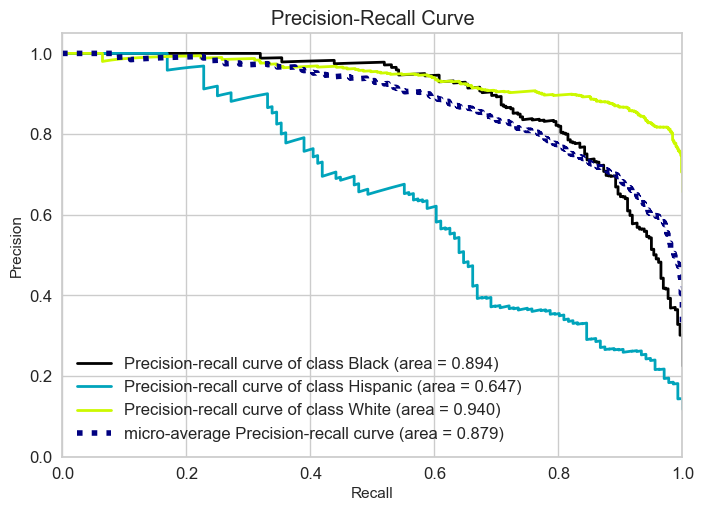

In [287]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = pipe_model_lgbm_optuna.predict_proba(X_test_lgbm)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### LightGBM Conclusion

In [357]:
# I selected pipe_lgbm_automl
start_time = time.time()
y_pred = pipe_lgbm_automl.predict(X_test)
end_time = time.time()
lgbm_time = end_time - start_time

y_pred_proba = pipe_lgbm_automl.predict_proba(X_test)

lgbm_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
lgbm_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
lgbm_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

lgbm_matthews =  matthews_corrcoef(y_test, y_pred)
lgbm_kappa = cohen_kappa_score(y_test, y_pred)


lgbm_AP, lgbm_f1, lgbm_recall, lgbm_matthews, lgbm_kappa, lgbm_time

(0.712877950915637,
 array([0.60946746]),
 array([0.75735294]),
 0.715263113566001,
 0.7083252323365867,
 0.14398527145385742)

## Catboost

### Vanilla catboost

In [ ]:
# pip install catboost
# %pip install flaml[catboost]

In [ ]:
class_weights

array([1.4820167 , 2.8330264 , 0.50703142])

In [ ]:
class_weights2 = 1 / y_train.value_counts(normalize=True)

In [301]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

cat_features = X_train.select_dtypes(include=['string[pyarrow]']).columns.tolist()


# Create a CatBoostClassifier model
cat_model = CatBoostClassifier(random_state = 42, loss_function = "MultiClass", verbose=500, auto_class_weights='Balanced', cat_features = cat_features, early_stopping_rounds=10, depth=2) 
# cat_model CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42)

# Fit the model on the training data
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.11133
0:	learn: 1.0820799	test: 1.0819964	best: 1.0819964 (0)	total: 63.5ms	remaining: 1m 3s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4650277691
bestIteration = 381

Shrink model to first 382 iterations.


In [302]:
eval_metric(cat_model, X_train, y_train, X_test, y_test)

Test_Set
[[231  12  17]
 [  6 101  29]
 [ 37  95 626]]
              precision    recall  f1-score   support

       Black       0.84      0.89      0.87       260
    Hispanic       0.49      0.74      0.59       136
       White       0.93      0.83      0.88       758

    accuracy                           0.83      1154
   macro avg       0.75      0.82      0.78      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[ 953   44   41]
 [  26  461   56]
 [ 107  386 2541]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90      1038
    Hispanic       0.52      0.85      0.64       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.89      0.86      0.87      4615



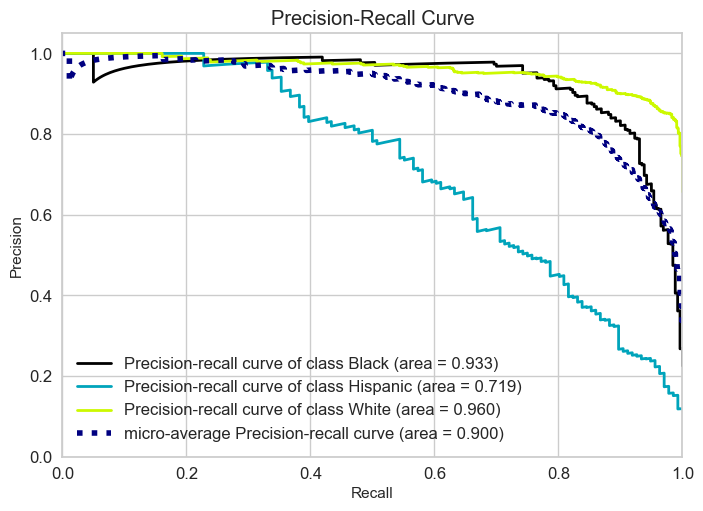

In [303]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = cat_model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Catboost optuna

In [ ]:
scoring = {#"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           #"recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [ ]:
import optuna
from catboost import CatBoostClassifier, Pool

# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameter search space
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 2, 4),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_state' : 42,
        'loss_function' : 'MultiClass',
        'cat_features' : cat_features,
        'auto_class_weights' : 'Balanced',
        'verbose' : 500
    }
    
    # Create the CatBoost model with the specified hyperparameters
    model = CatBoostClassifier(**params)
    
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True, fit_params={'eval_set': (X_test, y_test),'early_stopping_rounds':10})
    df_scores = pd.DataFrame(scores, index = range(1, 6))
    
    # Return mean cross-validation score
    return df_scores.mean()[2]



# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters found during optimization
best_params = study.best_params
print(best_params)

In [305]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

cat_features = X_train.select_dtypes(include=['string[pyarrow]']).columns.tolist()


# Create a CatBoostClassifier model
# 'learning_rate': 0.07307239119048335, 'depth': 4, 'l2_leaf_reg': 0.0037467912551314747, 'border_count': 33
cat_model_optuna = CatBoostClassifier(random_state = 42, loss_function = "MultiClass", verbose=500, auto_class_weights='Balanced', cat_features = cat_features, early_stopping_rounds=10, learning_rate= 0.022279964441925485, depth= 4, l2_leaf_reg= 0.10337168758219675, border_count= 104) 
# cat_model CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42)

# Fit the model on the training data
cat_model_optuna.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

0:	learn: 1.0925760	test: 1.0930058	best: 1.0930058 (0)	total: 36.2ms	remaining: 36.1s
500:	learn: 0.4540925	test: 0.5027965	best: 0.5027965 (500)	total: 11.8s	remaining: 11.8s
999:	learn: 0.3233415	test: 0.4543871	best: 0.4543871 (999)	total: 21.6s	remaining: 0us

bestTest = 0.4543870888
bestIteration = 999



In [306]:
eval_metric(cat_model_optuna, X_train, y_train, X_test, y_test)

Test_Set
[[235   9  16]
 [  6  99  31]
 [ 30  90 638]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.50      0.73      0.59       136
       White       0.93      0.84      0.88       758

    accuracy                           0.84      1154
   macro avg       0.77      0.82      0.79      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[ 980   24   34]
 [  14  494   35]
 [  75  307 2652]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.60      0.91      0.72       543
       White       0.97      0.87      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.83      0.91      0.86      4615
weighted avg       0.92      0.89      0.90      4615



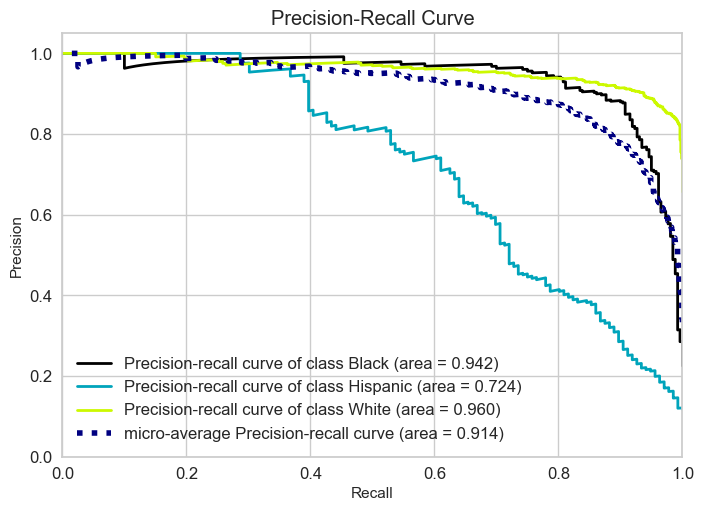

In [307]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = cat_model_optuna.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Catboost automl

In [308]:
starting_point_cat= {'catboost':{'learning_rate': 0.1976842816420024,
 'n_estimators': 26,
 'early_stopping_rounds': 10,
 'random_seed': 42,
 'auto_class_weights': 'Balanced',
 'loss_function': 'MultiClass',
 'cat_features': ['Gender', 'SubjectsBirthLocation', 'WritingPreference'],
 'eval_metric': 'TotalF1:use_weights=True',
 'verbose': 500}
}

In [310]:
def get_starting_points_cat():
    try:
        return automl_cat.best_config_per_estimator
    except:
        return starting_point_cat

In [311]:
get_starting_points_cat()

{'catboost': {'learning_rate': 0.1976842816420024,
  'n_estimators': 26,
  'early_stopping_rounds': 10,
  'random_seed': 42,
  'auto_class_weights': 'Balanced',
  'loss_function': 'MultiClass',
  'cat_features': ['Gender', 'SubjectsBirthLocation', 'WritingPreference'],
  'eval_metric': 'TotalF1:use_weights=True',
  'verbose': 500}}

In [312]:
recall_Hispanic = make_scorer(recall_Hispanic,average=None,labels=[1])
def custom_metric(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict_proba(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = log_loss(y_val, y_pred, labels=labels,
                         sample_weight=weight_val)
    y_pred = estimator.predict_proba(X_train)
    train_loss = log_loss(y_train, y_pred, labels=labels,
                          sample_weight=weight_train)
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

def custom_metric2(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = 1 - f1_score(y_val, y_pred, labels=[1], average=None, sample_weight=weight_val)[0]
    # print(y_val)
    # print(y_pred)
    # print()
    y_pred = estimator.predict(X_train)
    train_loss = 1 - f1_score(y_train, y_pred, labels=[1], average=None, sample_weight=weight_train)[0]
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

from flaml import AutoML
from flaml import tune

automl_settings_cat = {
    #"time_budget": 120,  # in seconds
    'max_iter': 100,
    "task": 'classification',
    "estimator_list": ['catboost'],
    'n_splits': 5,
    "eval_method": "cv",
    'metric': custom_metric,  #'macro_f1', #'accuracy',
    'early_stop':True,
    'log_file_name' : 'catboost_automl.log',
    "log_training_metric": True,  # whether to log training metric
    'starting_points': get_starting_points_cat(),
    "custom_hp": {
        "catboost": {
            # "depth": {
            #     'domain': tune.lograndint(lower=3, upper=4),
            #     'init_value': 3
            # },
            # "learning_rate": {
            #     'domain': 0.15,
            #     'init_value': 0.15
            # },
            "random_seed": {
                'domain': 42
            },
            'auto_class_weights': {
                'domain': 'Balanced'
            },
            'loss_function': {
                'domain' : 'MultiClass'
            },
            'cat_features': {
                'domain' : cat_features
            },
            'eval_metric':{
                'domain': 'TotalF1:use_weights=True'
            },
            'early_stopping_rounds':{
                'domain': 20
            },
            'verbose':{
                'domain': 500
            }

        }
    }
    # "fit_kwargs_by_estimator": {
    #     "catboost": {
    #         'eval_set':{
    #             'domain': [(X_test_lgbm, y_test_lgbm)]
    #         }
    #     }
    # }
}
automl_cat = AutoML()

pipeline_settings_cat = {
    f"automl__{key}": value for key, value in automl_settings_cat.items()
}

operations_cat_automl = [("automl", automl_cat)]

pipe_cat_automl = Pipeline(steps=operations_cat_automl)

pipe_cat_automl.fit(X_train_lgbm, y_train_lgbm, **pipeline_settings_cat)

[flaml.automl.automl: 04-23 01:02:13] {2726} INFO - task = classification
[flaml.automl.automl: 04-23 01:02:13] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 04-23 01:02:13] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-23 01:02:13] {2858} INFO - Minimizing error metric: customized metric
[flaml.automl.automl: 04-23 01:02:13] {164} WARNING - Starting point {'learning_rate': 0.1976842816420024, 'n_estimators': 26, 'early_stopping_rounds': 10, 'random_seed': 42, 'auto_class_weights': 'Balanced', 'loss_function': 'MultiClass', 'cat_features': ['Gender', 'SubjectsBirthLocation', 'WritingPreference'], 'eval_metric': 'TotalF1:use_weights=True', 'verbose': 500} removed because it is outside of the search space
[flaml.automl.automl: 04-23 01:02:13] {3004} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl.automl: 04-23 01:02:13] {3334} INFO - iteration 0, current learner catboost
0:	learn: 0.4973494	test: 0.4796161	best: 0.4796161 (0)	total:

Pipeline(steps=[('automl',
                 AutoML(append_log=False, auto_augment=True, custom_hp={},
                        cv_score_agg_func=None, early_stop=False,
                        ensemble=False, estimator_list='auto',
                        eval_method='auto', fit_kwargs_by_estimator={},
                        force_cancel=False, free_mem_ratio=0, hpo_method='auto',
                        keep_search_state=False, learner_selector='sample',
                        log_file_name='', log_training_metric=False,
                        log_type='better', max_iter=None, mem_thres=4294967296,
                        metric='auto', metric_constraints=[],
                        min_sample_size=10000, model_history=False,
                        n_concurrent_trials=1, n_jobs=-1, n_splits=5,
                        pred_time_limit=inf, preserve_checkpoint=True,
                        retrain_full=True, sample=True, ...))])

In [313]:
automl_cat.best_estimator

'catboost'

In [314]:
automl_cat.best_config

{'learning_rate': 0.10016411426956831,
 'n_estimators': 48,
 'early_stopping_rounds': 20,
 'random_seed': 42,
 'auto_class_weights': 'Balanced',
 'loss_function': 'MultiClass',
 'cat_features': ['Gender', 'SubjectsBirthLocation', 'WritingPreference'],
 'eval_metric': 'TotalF1:use_weights=True',
 'verbose': 500}

In [315]:
automl_cat.best_config_per_estimator

{'catboost': {'learning_rate': 0.10016411426956831,
  'n_estimators': 48,
  'early_stopping_rounds': 20,
  'random_seed': 42,
  'auto_class_weights': 'Balanced',
  'loss_function': 'MultiClass',
  'cat_features': ['Gender', 'SubjectsBirthLocation', 'WritingPreference'],
  'eval_metric': 'TotalF1:use_weights=True',
  'verbose': 500}}

In [316]:
eval_metric(pipe_cat_automl, X_train_lgbm, y_train_lgbm, X_test_lgbm, y_test_lgbm)
# datamiz dengeli accuracy skora bakabilirim.

Test_Set
[[216  14  30]
 [ 10  96  30]
 [ 55 102 601]]
              precision    recall  f1-score   support

       Black       0.77      0.83      0.80       260
    Hispanic       0.45      0.71      0.55       136
       White       0.91      0.79      0.85       758

    accuracy                           0.79      1154
   macro avg       0.71      0.78      0.73      1154
weighted avg       0.82      0.79      0.80      1154


Train_Set
[[ 906   50   82]
 [  42  415   86]
 [ 210  374 2450]]
              precision    recall  f1-score   support

       Black       0.78      0.87      0.83      1038
    Hispanic       0.49      0.76      0.60       543
       White       0.94      0.81      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.74      0.81      0.76      4615
weighted avg       0.85      0.82      0.83      4615



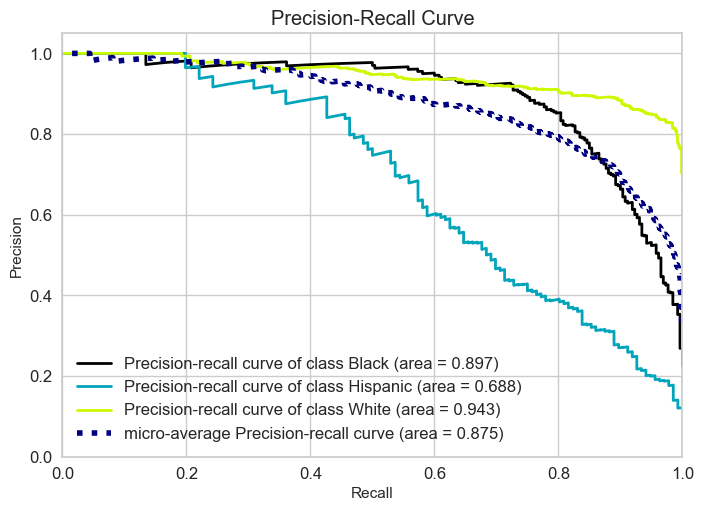

In [317]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = pipe_cat_automl.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Catboost Conclusion

In [358]:
# I selected cat_model
start_time = time.time()
y_pred = cat_model.predict(X_test)
end_time = time.time()
cat_time = end_time - start_time

y_pred_proba = cat_model.predict_proba(X_test)

cat_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
cat_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
cat_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

cat_matthews =  matthews_corrcoef(y_test, y_pred)
cat_kappa = cohen_kappa_score(y_test, y_pred)


cat_AP, cat_f1, cat_recall, cat_matthews, cat_kappa, cat_time

(0.7191482711367425,
 array([0.5872093]),
 array([0.74264706]),
 0.6945981397133228,
 0.687077691017858,
 0.10260009765625)

## Gradient Boosting

In [323]:
from sklearn.ensemble import GradientBoostingClassifier

In [330]:
operations_gb = [("OrdinalEncoder", column_trans), 
                  ("GB_model", GradientBoostingClassifier(n_estimators=80, max_depth=3, random_state=42, subsample = 0.7))]

params_pipe_gb = {
    'GB_model__sample_weight': classes_weights
}
pipe_model_gb = Pipeline(steps=operations_gb)

pipe_model_gb.fit(X_train, y_train, **params_pipe_gb)
# random foresttan farklı olarak:
# 1. Weak learner olabilmesi için default olarak max_dept=3 olarak düzenlenmiştir.
# 2. Tahmine her agacın ne kadar katkısı olacağı learning rate hyper parametresiyle düzenlenmiştir. defaultu 0.1'dir.
# 3. arka planda gradient descent tabanlı model kullanıldığından classificationda loss hyper parametresi vardır. Ve default 
# olarak log_loss'tur. Gradient boosting log_loss functionı ile residualleri minimize etmeye çalışır.
# 4. yaprakların dallanma kriteri olarak (criterion) mse'ye benzer birşekilde hesaplanan friedman_mse kullanılır. Model
# arka planda residualleri minimize etmeye çalıştığından regression modeli gibi çalışır.
# 5. subsample ile heragaçta ne kadar gözlem kullanılacağı tespit edilir. sub_sample=0.8 yaparsak her agaçta train datasından 
# rasgele seçtiği 0.8 oranındaki gözlemleri kullanır. Her agaç için bu işlem tekrarlanır. subsample düşürülürse overfitingi gidermeye yardımcı olur.
# 6. Diğer hyper_parametrelerin çoğu random forestle aynı veya benzerdir.

# Agaç sayısı veya learning rate arasındaki trade off iyi ayarlanmalıdır. Yoksa overfitinge gider.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingClassifier(n_estimators=80, random_state=42,
                                            subsample=0.7))])

In [331]:
eval_metric(pipe_model_gb, X_train, y_train, X_test, y_test)

Test_Set
[[229  13  18]
 [ 11  88  37]
 [ 38  96 624]]
              precision    recall  f1-score   support

       Black       0.82      0.88      0.85       260
    Hispanic       0.45      0.65      0.53       136
       White       0.92      0.82      0.87       758

    accuracy                           0.82      1154
   macro avg       0.73      0.78      0.75      1154
weighted avg       0.84      0.82      0.82      1154


Train_Set
[[ 983   23   32]
 [  16  481   46]
 [  78  295 2661]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93      1038
    Hispanic       0.60      0.89      0.72       543
       White       0.97      0.88      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.83      0.90      0.86      4615
weighted avg       0.91      0.89      0.90      4615



In [332]:
operations_gb = [("OrdinalEncoder", column_trans), 
                  ("GB_model", GradientBoostingClassifier(n_estimators=80, max_depth=3, random_state=42, subsample = 0.7))]

model = Pipeline(steps=operations_gb)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10, return_train_score=True,
                        fit_params=params_pipe_gb)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.824047
train_accuracy           0.899603
test_precision_macro     0.738683
train_precision_macro    0.836170
test_recall_macro        0.782856
train_recall_macro       0.910386
test_f1_macro            0.754227
train_f1_macro           0.864027
dtype: float64

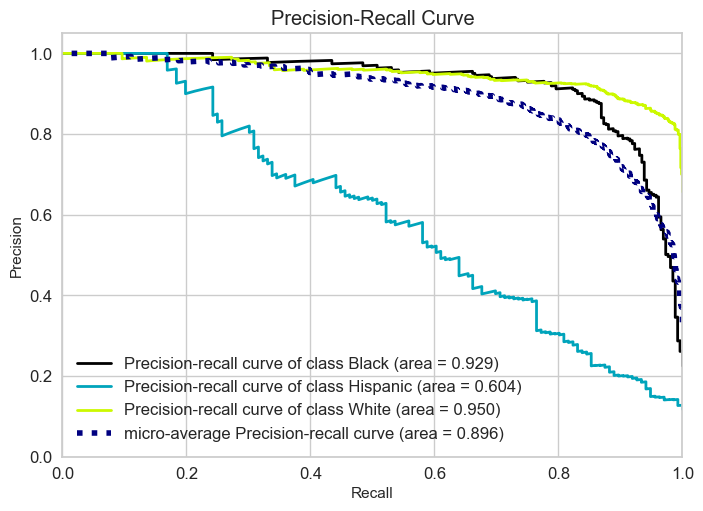

In [334]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = pipe_model_gb.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### GradientBoost Model GridsearchCV

In [335]:
from sklearn.model_selection import GridSearchCV

In [336]:
param_grid = {"GB_model__n_estimators":[40, 60],
              'GB_model__max_depth':[2, 3],
              "GB_model__learning_rate": [0.05 ,0.1],
              "GB_model__subsample":[0.8]}

In [339]:
operations_gb = [("OrdinalEncoder", column_trans),
                  ("GB_model", GradientBoostingClassifier(random_state=42))]

model = Pipeline(steps=operations_gb)

gb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=make_scorer(recall_score, average = None, labels =['Hispanic']),
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True,
                              verbose = 2)


In [340]:
gb_grid_model.fit(X_train,
                   y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END GB_model__learning_rate=0.05, GB_model__max_depth=2, GB_model__n_estimators=40, GB_model__subsample=0.8; total time=   8.8s
[CV] END GB_model__learning_rate=0.05, GB_model__max_depth=2, GB_model__n_estimators=40, GB_model__subsample=0.8; total time=   8.8s
[CV] END GB_model__learning_rate=0.05, GB_model__max_depth=2, GB_model__n_estimators=40, GB_model__subsample=0.8; total time=   8.8s
[CV] END GB_model__learning_rate=0.05, GB_model__max_depth=2, GB_model__n_estimators=40, GB_model__subsample=0.8; total time=   8.8s
[CV] END GB_model__learning_rate=0.05, GB_model__max_depth=2, GB_model__n_estimators=40, GB_model__subsample=0.8; total time=   9.7s
[CV] END GB_model__learning_rate=0.05, GB_model__max_depth=2, GB_model__n_estimators=60, GB_model__subsample=0.8; total time=  14.7s
[CV] END GB_model__learning_rate=0.05, GB_model__max_depth=2, GB_model__n_estimators=60, GB_model__subsample=0.8; total time=  14.6s
[CV] END 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('GB_model',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'GB_model__learning_rate': [0.05, 0.1],
                         'GB_model__max_depth': [2, 3],
                         'GB_model__n_estimators': [40, 60],
                         'GB_model__subsample': [0.8]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [341]:
gb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingClassifier(n_estimators=60, random_state=42,
                                            subsample=0.8))])

In [342]:
gb_grid_model.best_params_

{'GB_model__learning_rate': 0.1,
 'GB_model__max_depth': 3,
 'GB_model__n_estimators': 60,
 'GB_model__subsample': 0.8}

In [343]:
pd.DataFrame(gb_grid_model.cv_results_).loc[gb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.285287
mean_train_score    0.448904
Name: 7, dtype: object

In [344]:
eval_metric(gb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[212   2  46]
 [  7  43  86]
 [ 18  10 730]]
              precision    recall  f1-score   support

       Black       0.89      0.82      0.85       260
    Hispanic       0.78      0.32      0.45       136
       White       0.85      0.96      0.90       758

    accuracy                           0.85      1154
   macro avg       0.84      0.70      0.73      1154
weighted avg       0.85      0.85      0.84      1154


Train_Set
[[ 896    3  139]
 [  23  233  287]
 [  25   14 2995]]
              precision    recall  f1-score   support

       Black       0.95      0.86      0.90      1038
    Hispanic       0.93      0.43      0.59       543
       White       0.88      0.99      0.93      3034

    accuracy                           0.89      4615
   macro avg       0.92      0.76      0.81      4615
weighted avg       0.90      0.89      0.88      4615



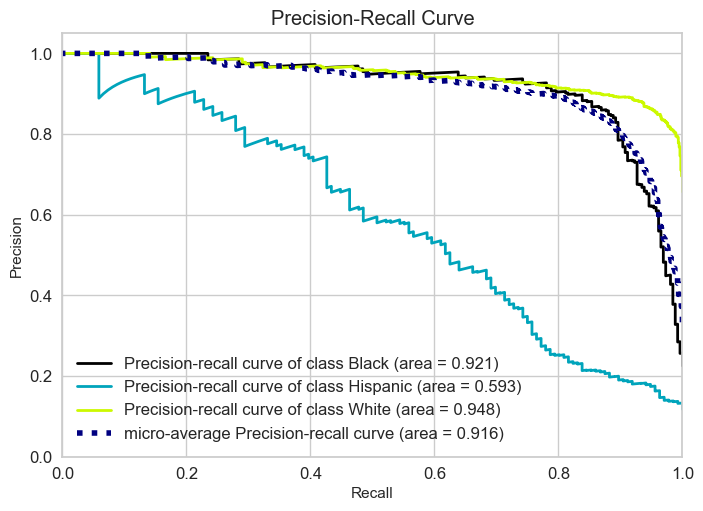

In [345]:
y_pred_proba = gb_grid_model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

### GradientBoost Conclusion

In [359]:
# I selected pipe_model_gb
start_time = time.time()
y_pred = pipe_model_gb.predict(X_test)
end_time = time.time()
gb_time = end_time - start_time

y_pred_proba = pipe_model_gb.predict_proba(X_test)

gb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
gb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
gb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

gb_matthews =  matthews_corrcoef(y_test, y_pred)
gb_kappa = cohen_kappa_score(y_test, y_pred)


gb_AP, gb_f1, gb_recall, gb_matthews, gb_kappa, gb_time

(0.6041188576440796,
 array([0.52852853]),
 array([0.64705882]),
 0.6635239289768473,
 0.657639262245077,
 0.05676698684692383)

## AutoML

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from flaml import AutoML

# Set up the FLAML AutoML object
automl = AutoML()

# Specify the search space for hyperparameters
settings = {
    "time_budget": 360,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
}

# Use FLAML to search for the best hyperparameters
automl.fit(X_train, y_train, **settings)


In [ ]:
automl.best_estimator

In [ ]:
automl.best_config

In [ ]:
eval_metric(automl, X_train, y_train, X_test, y_test)
# datamiz dengeli accuracy skora bakabilirim.

## Comparing Models

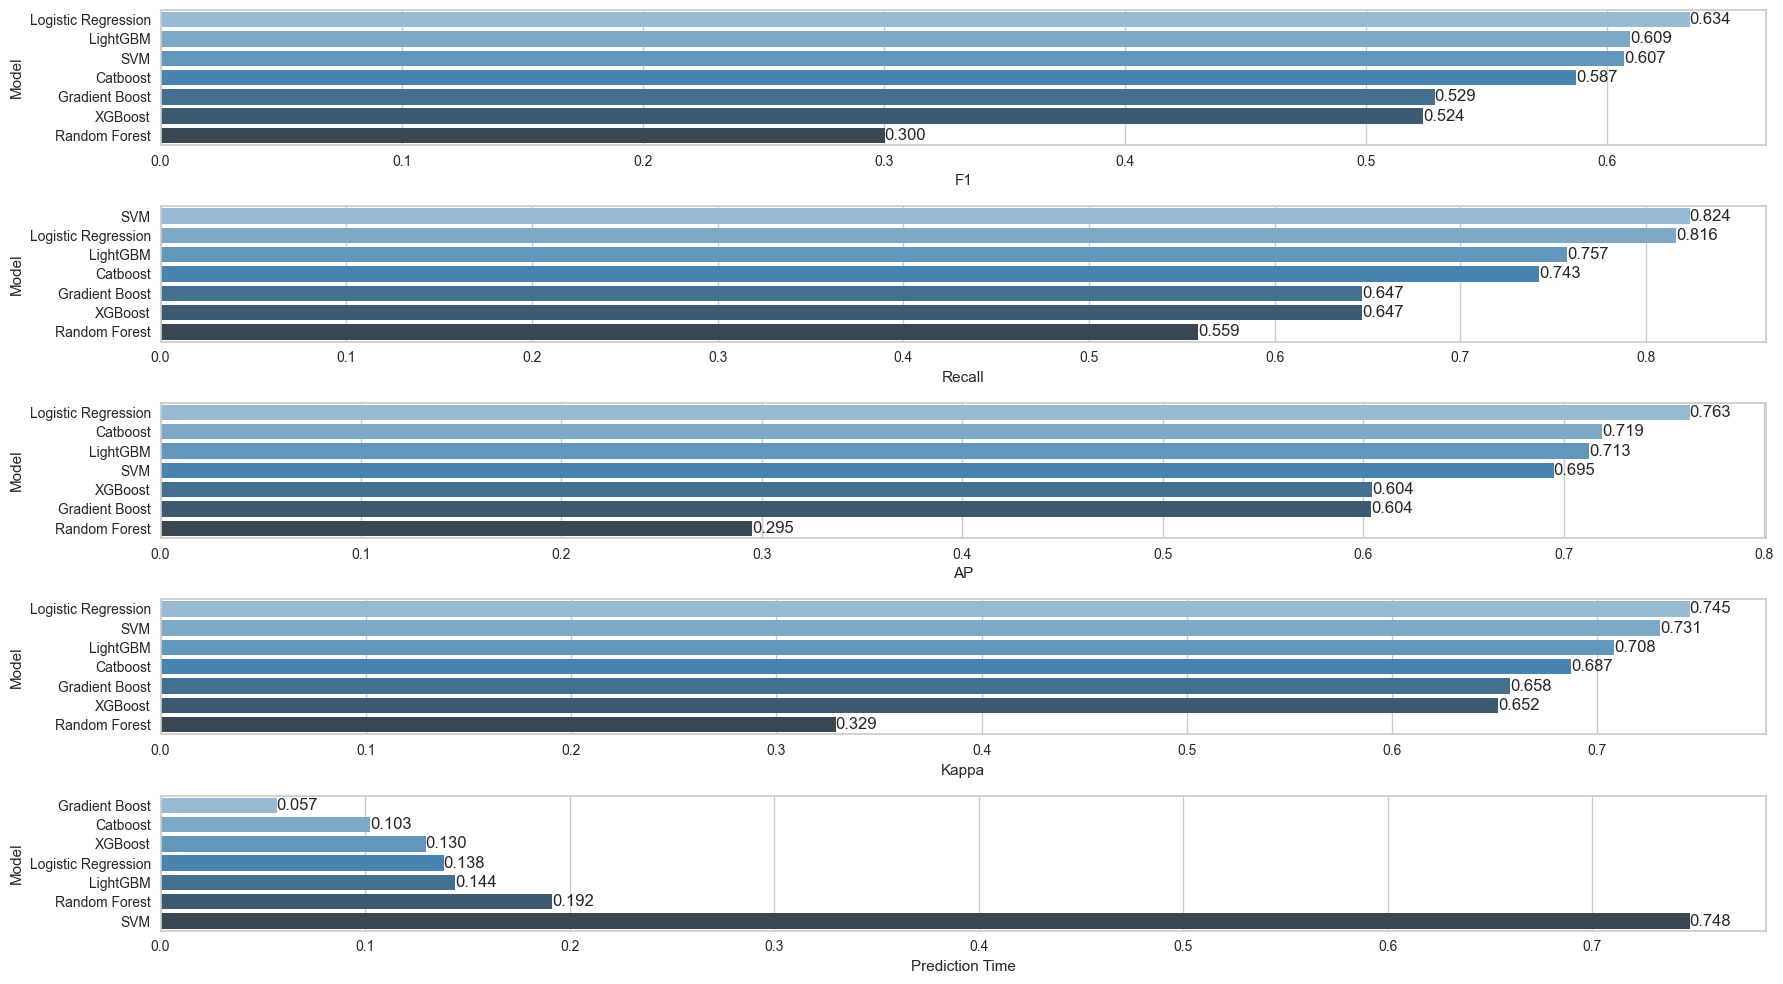

In [377]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost", 'LightGBM', 'Catboost','Gradient Boost'],
                        "F1": [log_f1[0], svm_f1[0], rf_f1[0], xgb_f1[0], lgbm_f1[0], cat_f1[0], gb_f1[0]],
                        "Recall": [log_recall[0], svm_recall[0], rf_recall[0], xgb_recall[0], lgbm_recall[0], cat_recall[0], gb_recall[0]],
                        "AP": [log_AP, svm_AP, rf_AP, xgb_AP, lgbm_AP, cat_AP, gb_AP],
                        "Kappa": [log_kappa, svm_kappa, rf_kappa, xgb_kappa, lgbm_kappa, cat_kappa, gb_kappa],
                        "Prediction Time": [log_time, svm_time, rf_time, xgb_time, lgbm_time, cat_time, gb_time]})

    
plt.figure(figsize=(18,10))
plt.subplot(5,1,1)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,2)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,3)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,4)
compare = compare.sort_values(by="Kappa", ascending=False)
ax=sns.barplot(x="Kappa", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,5)
compare = compare.sort_values(by="Prediction Time", ascending=True)
ax=sns.barplot(x="Prediction Time", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")



plt.tight_layout()
plt.show();

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
#!pip install imblearn

In [383]:
from imblearn.over_sampling import SMOTE # azınlık olan classları çoğunluk classa eşitler veya yakınlaştırır.
from imblearn.under_sampling import RandomUnderSampler # çoğunluk olan classı azınlık olan classa eşitler veya yakınlaştırır
from imblearn.pipeline import Pipeline as imbpipeline

# imblearn.pipeline skleran kütüphanesinin pipeline kütüphanesinden farklıdır. sklearn pipeline sadece fit, transform, predict 
# ve predict_proba fonksiyonlarını çalıştırırken imblearn.pipeline bunlara ilave olarak resample fonksiyonunu da çalıştırır.

In [384]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# sampling_strategy hyper_parametresi ile classları isteğimiz sayıda artıra bilir veya azaltabiliriz.

In [385]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

## Logistic Regression Over/Under Sampling

In [386]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [387]:
operations = [("OneHotEncoder",column_trans), 
              ('o', over),
              ('u', under), 
              ("log", LogisticRegression(max_iter=10000, 
                                         random_state=101))] #("scaler", MinMaxScaler())

# over veya under sampling dataya uygulandığında kesinlikle class_weight="balanced" kullanılmaz.

In [390]:
smote_pipeline_log = imbpipeline(steps=operations)

In [391]:
smote_pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [393]:
eval_metric(smote_pipeline_log, X_train, y_train, X_test, y_test)

Test_Set
[[235   7  18]
 [  4  96  36]
 [ 14  37 707]]
              precision    recall  f1-score   support

       Black       0.93      0.90      0.92       260
    Hispanic       0.69      0.71      0.70       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 948   30   60]
 [  25  385  133]
 [  25  151 2858]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93      1038
    Hispanic       0.68      0.71      0.69       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.85      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [394]:
model = imbpipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic     0.632429
train_f1_Hispanic    0.701456
dtype: float64

## SVC Over/Under Sampling

## LightGBM Over/ Under Sampling

In [443]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                       remainder='passthrough')

In [470]:
def get_starting_points_lgbm_smote():
    try:
        return automl_lgbm_smote.best_config_per_estimator
    except:
        return starting_point_lgbm

In [475]:
recall_Hispanic = make_scorer(recall_Hispanic,average=None,labels=[1])
def custom_metric(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict_proba(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = log_loss(y_val, y_pred, labels=labels,
                         sample_weight=weight_val)
    # print(y_val)
    # print(y_pred)
    # print(recall_score(y_val, estimator.predict(X_val), labels=[1], average=None, sample_weight=weight_val))
    y_pred = estimator.predict_proba(X_train)
    train_loss = log_loss(y_train, y_pred, labels=labels,
                          sample_weight=weight_train)
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

def custom_metric2(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = 1 - f1_score(y_val, y_pred, labels=[1], average=None, sample_weight=weight_val)[0]
    # print(y_val)
    # print(y_pred)
    # print()
    y_pred = estimator.predict(X_train)
    train_loss = 1 - f1_score(y_train, y_pred, labels=[1], average=None, sample_weight=weight_train)[0]
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

from flaml import AutoML
from flaml import tune

automl_settings_lgbm_smote = {
    "time_budget": 120,  # in seconds
    "task": 'classification',
    "estimator_list": ['lgbm'],
    'n_splits': 5,
    "eval_method": "cv",
    'metric': custom_metric2,  #'macro_f1', #'accuracy',
    'early_stop':True,
    'log_file_name' : 'lgbm_automl.log',
    "log_training_metric": True,  # whether to log training metric
    'starting_points': get_starting_points_lgbm_smote(),
    "custom_hp": {
        "lgbm": {
            "max_depth": {
                'domain': tune.lograndint(lower=3, upper=4),
                'init_value': 3
            },
            # "num_leaves": {
            #     'domain': 7,
            #     'init_value': 7
            # },
            # "bagging_freq": {
            #     'domain': 5,
            #     'init_value': 5
            # },
            # "bagging_fraction": {
            #     'domain': 0.6,
            #     'init_value': 0.6
            # },
            "log_max_bin": {
                'domain': tune.randint(lower=3, upper=6),
                'init_value': 3
            },
            # "min_data_in_leaf": {
            #     'domain': tune.lograndint(lower=100, upper=300),
            #     'init_value': 150
            # },
            # "learning_rate": {
            #     'domain': 0.15,
            #     'init_value': 0.15
            # },
            "n_estimators": {
                'domain': tune.lograndint(lower=30, upper=80),
                'init_value': 30
            },
            "random_state": {
                'domain': 42,
                'init_value': 42
            },
            'class_weight': {
                'domain': None
            }, #smote da class_weight kullanilmaz
            'objective': {
                'domain' : 'multiclass'
            },
            'num_class': {
                'domain' : 3
            },
            # 'categorical_feature':{
            #     'domain' : lgbm_features
            # },
            # 'eval_set':{
            #     'domain': [(X_test_lgbm, y_test_lgbm)]
            # },
            # 'eval_metric':{
            #     'domain': 'multi_logloss'
            # },
            # 'early_stopping_rounds':{
            #     'domain': 10
            # },
            'subsample':{
                'domain': 0.8
            }
        }
    }

}
automl_lgbm_smote = AutoML()

pipeline_settings_lgbm_smote = {
    f"automl__{key}": value for key, value in automl_settings_lgbm_smote.items()
}

operations = [("OrdinalEncoder",column_trans), 
              ('o', over),
              ('u', under), 
              ("automl", automl_lgbm_smote)] #("scaler", MinMaxScaler())

# over veya under sampling dataya uygulandığında kesinlikle class_weight="balanced" kullanılmaz.

smote_pipeline_lgbm = imbpipeline(steps=operations)

In [476]:
smote_pipeline_lgbm.fit(X_train_lgbm, y_train_lgbm, **pipeline_settings_lgbm_smote)

[flaml.automl.automl: 04-24 19:14:26] {2726} INFO - task = classification
[flaml.automl.automl: 04-24 19:14:26] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 04-24 19:14:26] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-24 19:14:26] {2858} INFO - Minimizing error metric: customized metric
[flaml.automl.automl: 04-24 19:14:26] {164} WARNING - Starting point {'n_estimators': 149, 'num_leaves': 117, 'min_child_samples': 26, 'learning_rate': 0.7070175634274689, 'log_max_bin': 3, 'colsample_bytree': 0.47512213423832195, 'reg_alpha': 0.00734674761355395, 'reg_lambda': 0.008444342728977818, 'max_depth': 3, 'random_state': 42, 'objective': 'multiclass', 'num_class': 3, 'subsample': 0.8} removed because it is outside of the search space
[flaml.automl.automl: 04-24 19:14:26] {3004} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.automl: 04-24 19:14:26] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-24 19:14:29] {3472} 

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'...
                        force_cancel=False, free_mem_ratio=0, hpo_method='auto',
                        keep_search_state=False, learner_selector='sample',
                        log_file_name='', log_training_metric=False,
                        log_type='better', max_iter=None, mem_thres=4294967296,
                        metric='auto', metric_constraints=[],
                        min_sample_size=10000, model_history=False,
                        n_concurrent_trials=1, n_jobs=-1, n_splits=5,
                        pred_time_limit=inf, preserve_checkpoint=True,
                        retrain_full=True, sample=True, ...))])

In [477]:
automl_lgbm_smote.best_config_per_estimator

{'lgbm': {'n_estimators': 31,
  'num_leaves': 35,
  'min_child_samples': 7,
  'learning_rate': 1.0,
  'log_max_bin': 3,
  'colsample_bytree': 0.7067922641795248,
  'reg_alpha': 0.009204247961305022,
  'reg_lambda': 75.90189350411084,
  'max_depth': 3,
  'random_state': 42,
  'objective': 'multiclass',
  'num_class': 3,
  'subsample': 0.8}}

In [478]:
eval_metric(smote_pipeline_lgbm, X_train_lgbm, y_train_lgbm, X_test_lgbm, y_test_lgbm)
# sonuclar daha kotulesti.

Test_Set
[[224   6  30]
 [ 10  60  66]
 [ 23  57 678]]
              precision    recall  f1-score   support

       Black       0.87      0.86      0.87       260
    Hispanic       0.49      0.44      0.46       136
       White       0.88      0.89      0.89       758

    accuracy                           0.83      1154
   macro avg       0.75      0.73      0.74      1154
weighted avg       0.83      0.83      0.83      1154


Train_Set
[[ 944   31   63]
 [  30  343  170]
 [  42  126 2866]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92      1038
    Hispanic       0.69      0.63      0.66       543
       White       0.92      0.94      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.85      0.83      0.84      4615
weighted avg       0.90      0.90      0.90      4615



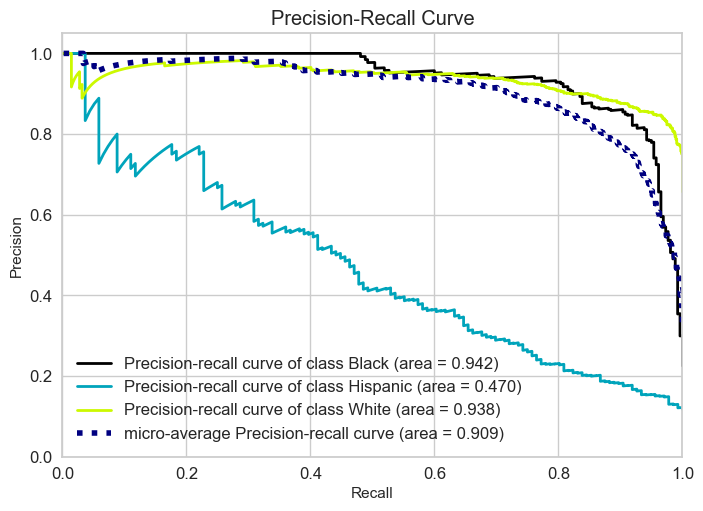

In [480]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = smote_pipeline_lgbm.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [485]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                           sparse=False), cat), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',
                                max_iter=10000,
                                random_state=101,
                                penalty="l1",
                                solver='saga')

model_shap.fit(X_train_trans, y_train)

# X-train ve X_test'e onehotencoder dönüşümü uyguluyoruz.
# shap pipeline ile kurulmuş model ile çalışmadığından dönüşüm işlemlerini manuel olarak yapacağız.

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [486]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[244   9   7]
 [  5 111  20]
 [ 28  89 641]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.53      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 973   34   31]
 [  19  457   67]
 [  66  350 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.89      4615



In [487]:
operations = [("OneHotEncoder", column_trans_shap),
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101,
                                         penalty="l1",
                                         solver='saga'))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

# over_fiting yok.
# L1 seciyoruz. Feature importance icin.

test_f1_Hispanic     0.595505
train_f1_Hispanic    0.663888
dtype: float64

In [488]:
features = column_trans_shap.get_feature_names_out()
features

# dönüşümü make_column_transform fonksiyonu ile yaptığımızdan X_train_trans ve X_test_trans datalarının feature
# sıralaması aşağıdaki gibi değiştiğinden shap fonksiyonu içinde bu feature sıralamasını kullanacağız.

array(['Gender_Female', 'Gender_Male', 'SubjectsBirthLocation_Alabama',
       'SubjectsBirthLocation_Alaska',
       'SubjectsBirthLocation_Antigua and Barbuda',
       'SubjectsBirthLocation_Argentina', 'SubjectsBirthLocation_Arizona',
       'SubjectsBirthLocation_Arkansas',
       'SubjectsBirthLocation_Azerbaijan',
       'SubjectsBirthLocation_Bahamas', 'SubjectsBirthLocation_Barbados',
       'SubjectsBirthLocation_Belarus', 'SubjectsBirthLocation_Belgium',
       'SubjectsBirthLocation_Belize', 'SubjectsBirthLocation_Bermuda',
       'SubjectsBirthLocation_Bolivia', 'SubjectsBirthLocation_Brazil',
       'SubjectsBirthLocation_British Virgin Islands',
       'SubjectsBirthLocation_Bulgaria',
       'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Cameroon', 'SubjectsBirthLocation_Canada',
       'SubjectsBirthLocation_Chile', 'SubjectsBirthLocation_Colombia',
       'SubjectsBirthLocation_Colorado',
       'SubjectsBirthLocation_Connecticut',
       'SubjectsBi

## SHAP values for Feature Selection (train data)

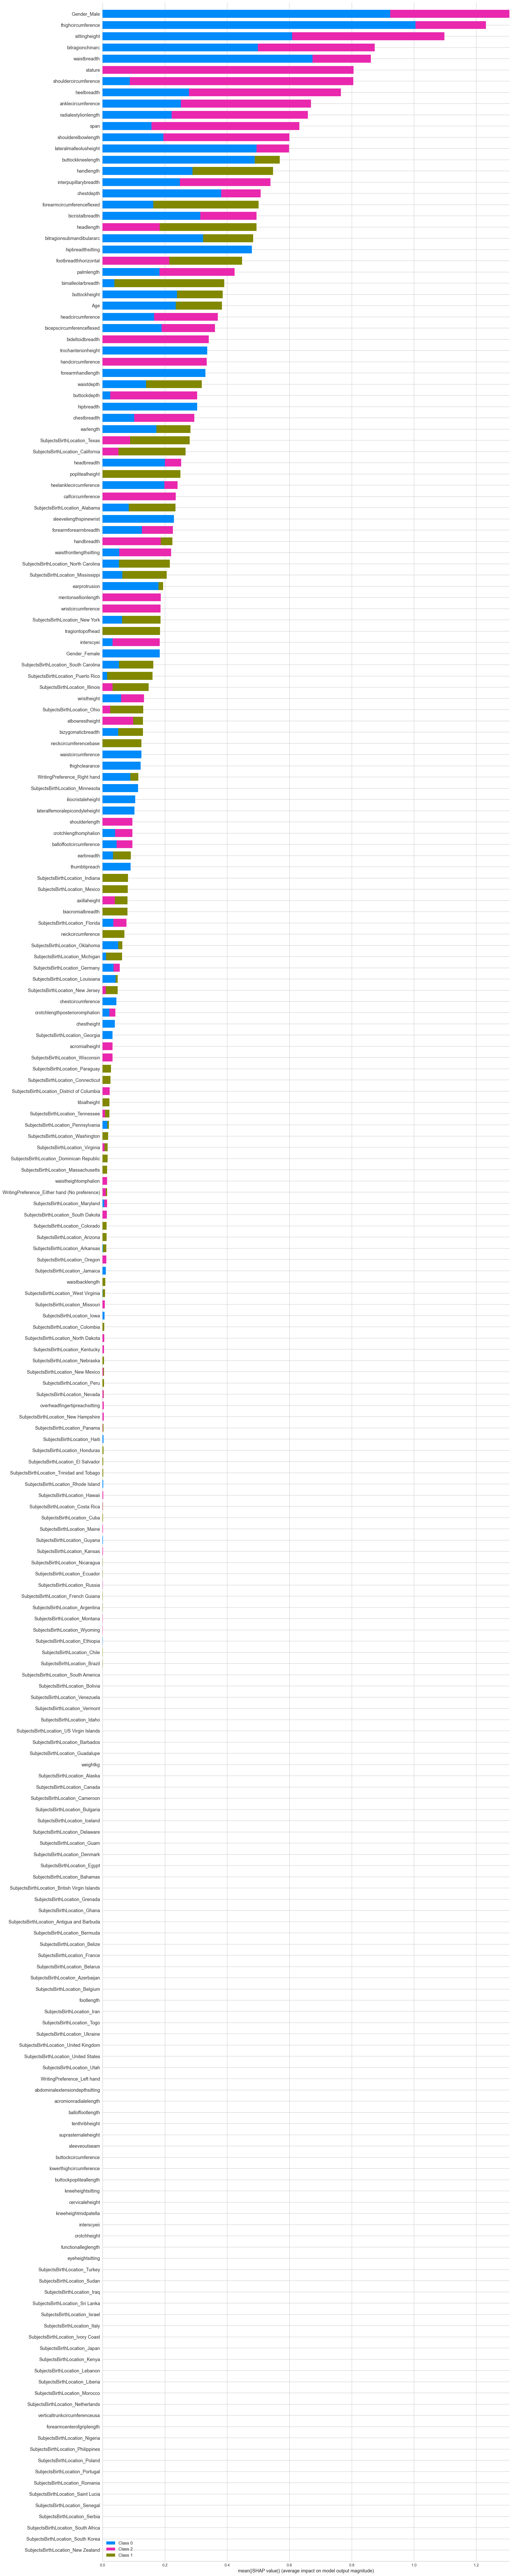

In [489]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, max_display=300, feature_names = features, plot_size=(20,100))

# maviler black, pembe white ve yeşil hispanic
# gördüğünüz gibi en önemli ilk 13 feature içerisinde hispanic'in tahminine katkı sağlayan feature yok.
# hispaniclerin predictionesine katkısı olan 19 feature seçiyoruz.

# Her bir featurein hangi classi tahmin etmede ne kadar katkisi var.
# stature whitelari ayirt ediyormus.

In [492]:
hispanic=["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
          'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 
          'tragiontopofhead', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 
          'buttockkneelength', 'earlength', "Age", 'handbreadth', 'elbowrestheight','bizygomaticbreadth','earbreadth','neckcircumference','tibialheight','waistbacklength'] # 'bideltoidbreadth', 'axillaheight',

In [493]:
X2 = X[hispanic]
X2.head()

SubjectsBirthLocation  handlength  forearmcircumferenceflexed  headlength   
0          North Dakota         193                         299         206  \
1              New York         195                         289         201   
2              New York         203                         357         202   
3             Wisconsin         194                         318         199   
4        North Carolina         218                         324         197   

   bitragionsubmandibulararc  footbreadthhorizontal  bimalleolarbreadth   
0                        291                    101                  71  \
1                        320                     98                  67   
2                        330                    103                  75   
3                        309                    106                  73   
4                        310                    111                  80   

   poplitealheight  waistdepth WritingPreference  tragiontopofhead   
0              437         240        Right hand               140  \
1              417         225         Left hand               120   
2              431         255         Left hand               125   
3              393         205        Right hand               127   
4              523         214        Right hand               122   

   neckcircumferencebase  biacromialbreadth  buttockheight  buttockkneelength   
0                    436                401            882                619  \
1                    420                394            870                584   
2                    434                427            901                623   
3                    446                401            821                560   
4                    430                435           1080                706   

   earlength  Age  handbreadth  elbowrestheight  bizygomaticbreadth   
0         71   41           90              247                 142  \
1         62   35           86              232                 135   
2         61   42           93              237                 135   
3         66   31           91              272                 143   
4         56   21           94              188                 138   

   earbreadth  neckcircumference  tibialheight  waistbacklength  
0          36                400           491              501  
1          33                380           476              432  
2          40                403           477              472  
3          39                407           445              461  
4          32                398           584              467

In [496]:
cat_new = X2.select_dtypes("string[pyarrow]").columns
cat_new

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [497]:
X2.shape

(5769, 24)

In [498]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [499]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                           sparse=False), cat_new), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

operations_shap = [("OneHotEncoder",column_trans_shap),
                   ("log", LogisticRegression(class_weight='balanced',
                                              max_iter=10000,
                                              random_state=101,
                                              penalty="l1",
                                              solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [500]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[224  14  22]
 [  4 109  23]
 [108 121 529]]
              precision    recall  f1-score   support

       Black       0.67      0.86      0.75       260
    Hispanic       0.45      0.80      0.57       136
       White       0.92      0.70      0.79       758

    accuracy                           0.75      1154
   macro avg       0.68      0.79      0.71      1154
weighted avg       0.81      0.75      0.76      1154


Train_Set
[[ 870   53  115]
 [  31  433   79]
 [ 335  494 2205]]
              precision    recall  f1-score   support

       Black       0.70      0.84      0.77      1038
    Hispanic       0.44      0.80      0.57       543
       White       0.92      0.73      0.81      3034

    accuracy                           0.76      4615
   macro avg       0.69      0.79      0.72      4615
weighted avg       0.81      0.76      0.77      4615



In [501]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, 
                        X_train2,
                        y_train2, 
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic     0.536762
train_f1_Hispanic    0.570351
dtype: float64

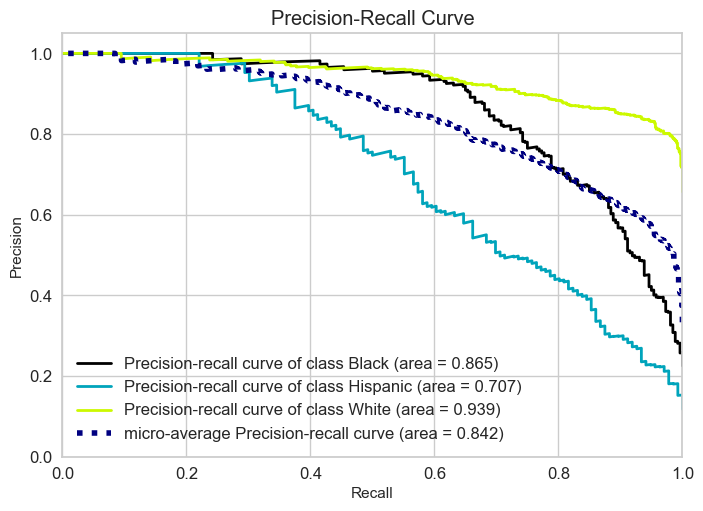

In [502]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show();

## Catboost SHAP values for Feature Selection (train data)

In [516]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

cat_features = X_train.select_dtypes(include=['string[pyarrow]']).columns.tolist()


# Create a CatBoostClassifier model
cat_model2 = CatBoostClassifier(random_state = 42, loss_function = "MultiClass", verbose=500, auto_class_weights='Balanced', cat_features = cat_features, early_stopping_rounds=10, depth=2) 

# Fit the model on the training data
cat_model2.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.11133
0:	learn: 1.0820799	test: 1.0819964	best: 1.0819964 (0)	total: 35.5ms	remaining: 35.5s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4650277691
bestIteration = 381

Shrink model to first 382 iterations.


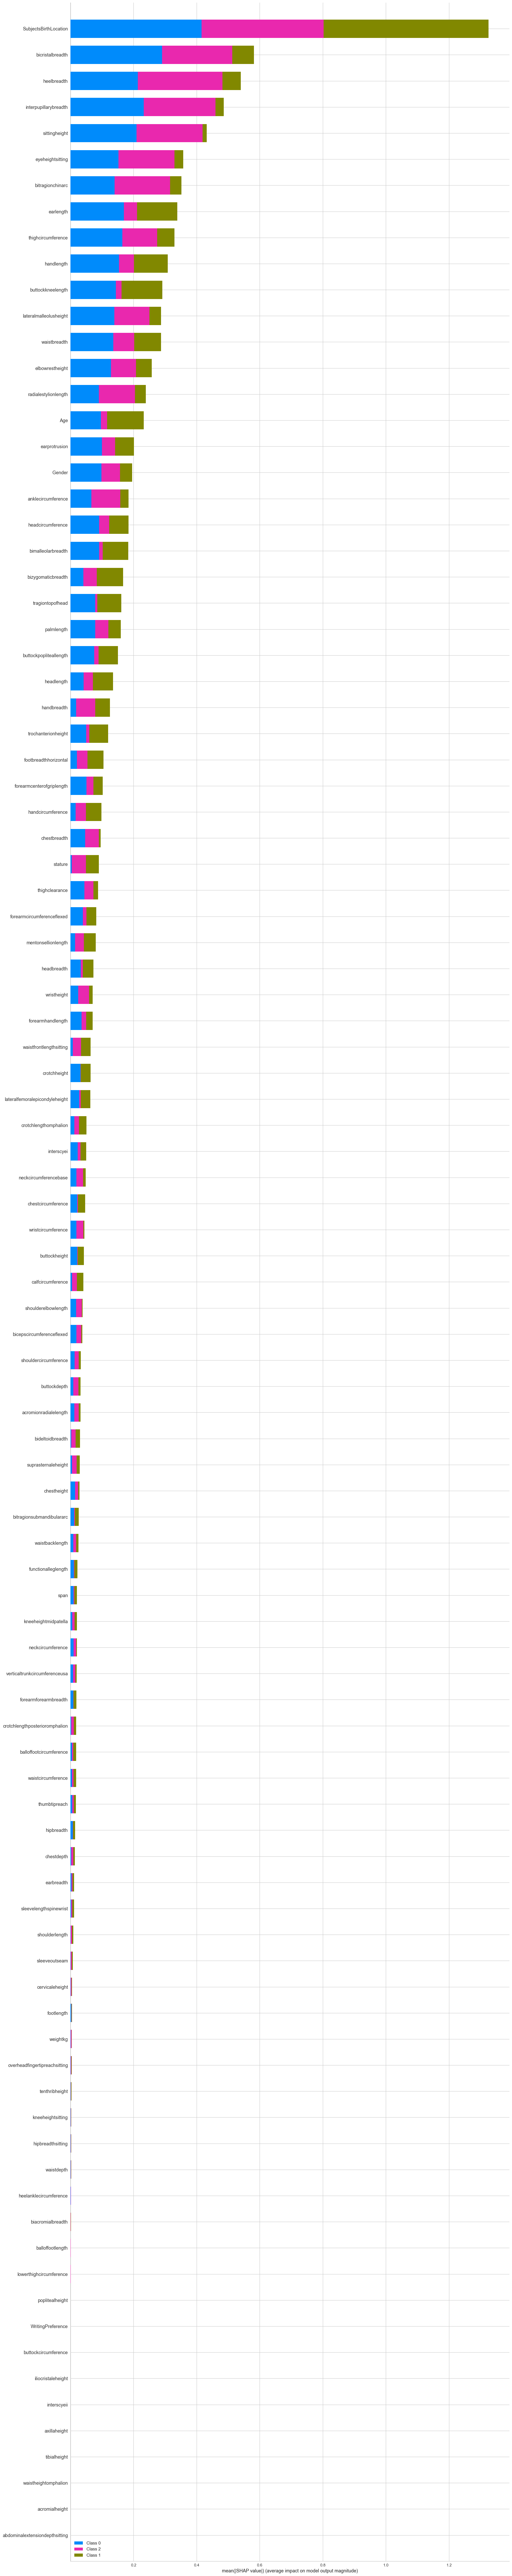

In [520]:
explainer = shap.TreeExplainer(cat_model2)

shap_values = explainer.shap_values(X_train)

# shap.summary_plot(shap_values, X_train)

shap.summary_plot(shap_values, X_train, max_display=300, plot_size=(20,100))

# maviler black, pembe white ve yeşil hispanic
# gördüğünüz gibi en önemli ilk 13 feature içerisinde hispanic'in tahminine katkı sağlayan feature yok.
# hispaniclerin predictionesine katkısı olan 19 feature seçiyoruz.

# Her bir featurein hangi classi tahmin etmede ne kadar katkisi var.
# stature whitelari ayirt ediyormus.

In [ ]:
hispanic=["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
          'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 
          'tragiontopofhead', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 
          'buttockkneelength', 'earlength', "Age", 'handbreadth', 'elbowrestheight','bizygomaticbreadth','earbreadth','neckcircumference','tibialheight','waistbacklength'] # 'bideltoidbreadth', 'axillaheight',

In [521]:
eval_metric(cat_model2, X_train, y_train, X_test, y_test)

Test_Set
[[231  12  17]
 [  6 101  29]
 [ 37  95 626]]
              precision    recall  f1-score   support

       Black       0.84      0.89      0.87       260
    Hispanic       0.49      0.74      0.59       136
       White       0.93      0.83      0.88       758

    accuracy                           0.83      1154
   macro avg       0.75      0.82      0.78      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[ 953   44   41]
 [  26  461   56]
 [ 107  386 2541]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90      1038
    Hispanic       0.52      0.85      0.64       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.89      0.86      0.87      4615



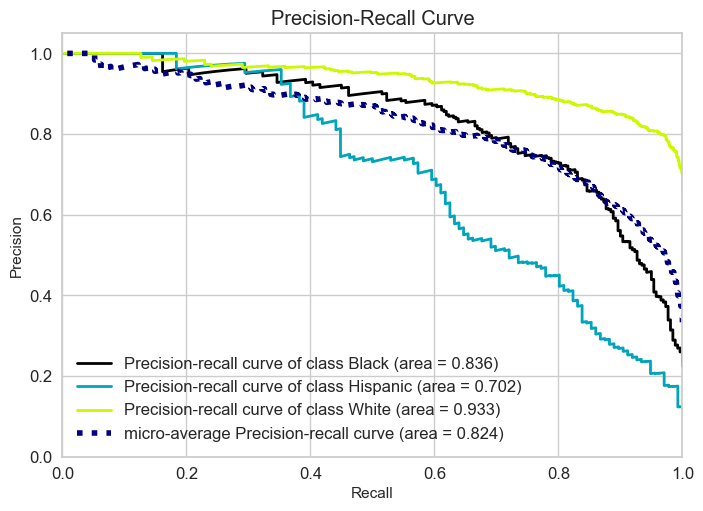

In [508]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = cat_model2.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show();

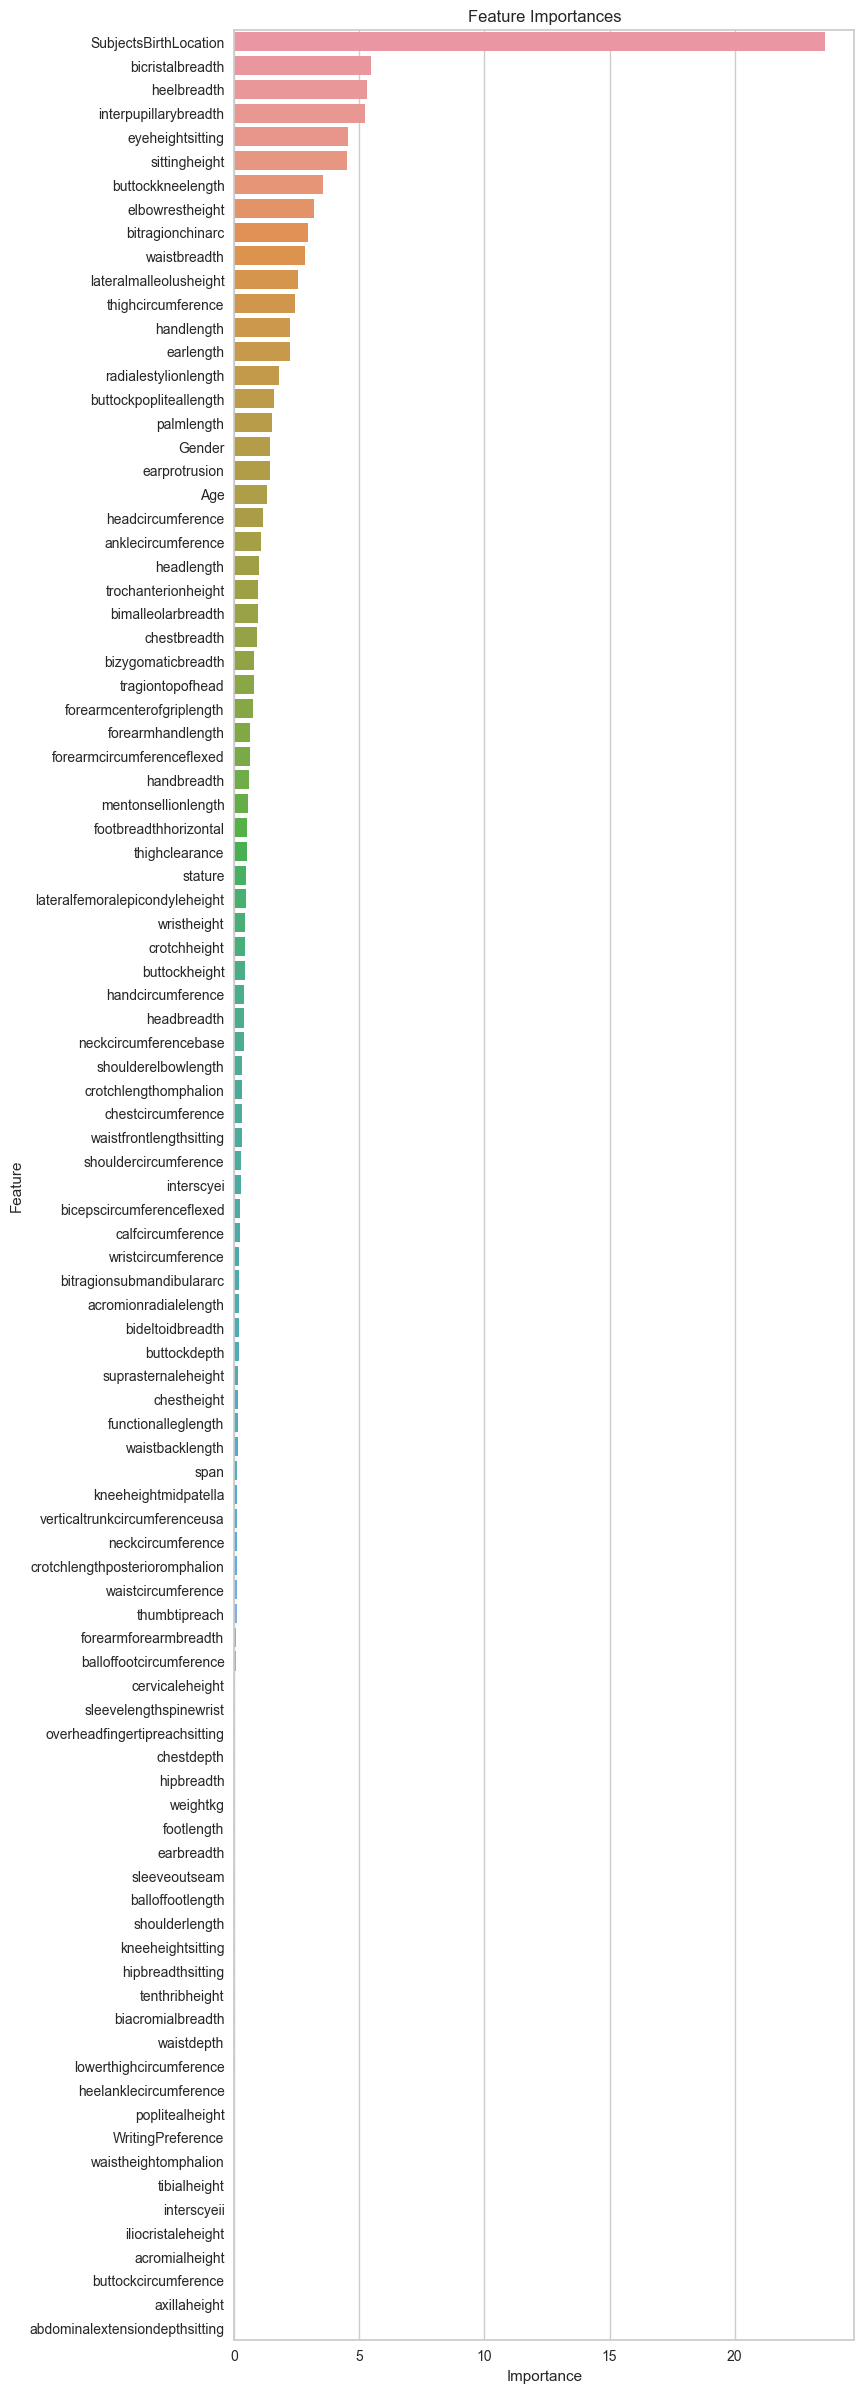

In [531]:
importances = cat_model2.get_feature_importance()
feature_names = X_train.columns

# Create a DataFrame of feature importances and column names
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Create a horizontal bar plot of feature importances
plt.figure(figsize=(8, 30))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Final Model -  Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [553]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                            sparse=False), cat),
                                              remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),
                    ("log", LogisticRegression(class_weight='balanced',
                                               max_iter=10000,
                                               random_state=101))]

final_model = Pipeline(steps=operations_final)

In [554]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [555]:
from sklearn.metrics import cohen_kappa_score

y_pred = final_model.predict(X_test)

cohen_kappa_score(y_test, y_pred)

0.7739520999384765

In [556]:
import pickle
# Save the pipeline and model
with open('soldier_race_pipe.pkl', 'wb') as file:
    pickle.dump(final_model, file)


In [557]:
# Load the pipeline and model
with open('soldier_race_pipe.pkl', 'rb') as file:
    pipeline = pickle.load(file)



In [558]:
male_mean_human = X[X.Gender=="Male"].describe(include="all").loc["mean"]
male_mean_human

# "mean" değerlerini "loc["mean"]" kullanarak alıyoruz ve "include="all"" parametresiyle kategorik verilerin de döndürülmesini sağlıyoruz. 
#  Kategorik verilerde NaN değerleri dönebileceğinden, bu kategorik gözlemlere aşağıdaki atamaları yapıyoruz." 

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
                                     ...     
wristheight                        848.762247
Gender                                    NaN
SubjectsBirthLocation                     NaN
Age                                 30.172352
WritingPreference                         NaN
Name: mean, Length: 97, dtype: object

In [561]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [560]:
# Make predictions using the loaded pipeline
pipeline.predict(pd.DataFrame(male_mean_human).T)

array(['Hispanic'], dtype=object)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___